# classes and AP/SAT

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

data = pd.read_csv('USA_Education_Proportions_updatedforpuerto.csv')
class_data_full = data.copy()
data.shape


(53, 18)

In [2]:
for column_name in data.columns: 
    print(column_name)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Class room teachers FTE COUNT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Total per state
Total Enrollment Per State
AP total enrollment per state
SAT-ACT Percent per state
AP enrollent Percent Per state


In [3]:
for i in class_data_full.columns:
    print(i)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Class room teachers FTE COUNT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Total per state
Total Enrollment Per State
AP total enrollment per state
SAT-ACT Percent per state
AP enrollent Percent Per state


In [4]:
#dropping count columns from dataframe
data.drop("Class room teachers FTE COUNT", inplace =True, axis =1)
data.drop("SAT-ACT Total per state", inplace =True, axis =1)
data.drop("Total Enrollment Per State", inplace =True, axis =1)
data.drop("AP total enrollment per state", inplace =True, axis =1)

#data_Purto_Rico_AVG = data  #setting new purto rico data set to then make the changes in plot comparison

#double checking that all of the necessary columns were dropped
for column_name in data.columns: 
    print(column_name)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Percent per state
AP enrollent Percent Per state


#  IN REPORT

In [5]:
data.head()
data.shape
data[52:]

,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Meeting all lic. & cert. Percent,First year of teaching PERCENT,Second year of teaching PERCENT,SAT-ACT Percent per state,AP enrollent Percent Per state
52,Puerto Rico,0.106061,0.863636,0.852273,0.530303,0.060606,0.844697,0.818182,0.742424,0.830699,0.040463,0.051988,0.0,0.02005


In [6]:
SAT_ACT_AVG = data["SAT-ACT Percent per state"].mean()

print(SAT_ACT_AVG)

# Updating the value for SAT-ACT percent for Puerto Rico

data.iloc[52, 12] = SAT_ACT_AVG


#keep this section commented out because I dont want to rewrite a bunch of things later in this code
#data_Purto_Rico_AVG.iloc[52, 12] = SAT_ACT_AVG

0.07289848681132076


# IN REPORT


In [7]:
#Pueto rico is now having the average SAT-ACT value, will run the code as before to see how it affects the clustering

data[52:]*100

,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Meeting all lic. & cert. Percent,First year of teaching PERCENT,Second year of teaching PERCENT,SAT-ACT Percent per state,AP enrollent Percent Per state
52,Puerto RicoPuerto RicoPuerto RicoPuerto RicoPu...,10.606061,86.363636,85.227273,53.030303,6.060606,84.469697,81.818182,74.242424,83.0699,4.0463,5.1988,7.289849,2.004995


# redo this section to reporesent the before and after changes from the eigenvalue plot

## covariance matrix 

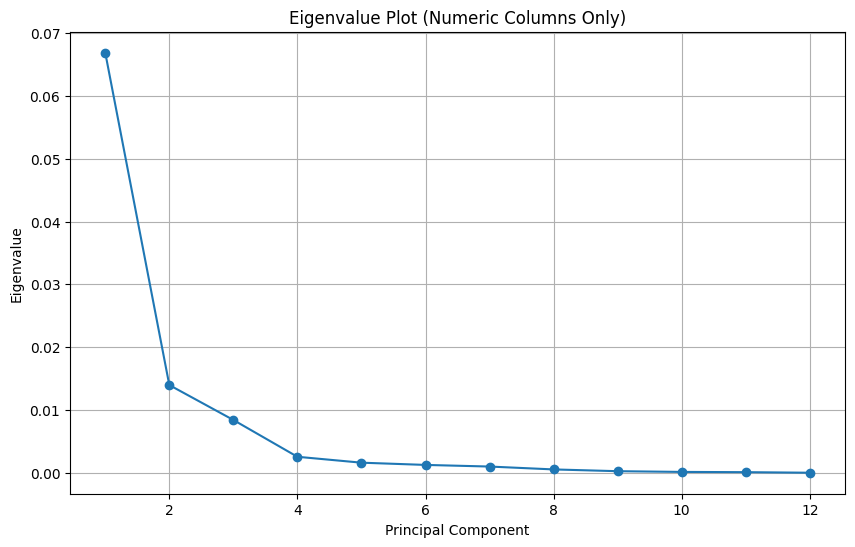

'\nPost Purto Rico Change\n\nThis plot looks effectivly the same based on my memory, will again have to make th paired plot to make closer judgements\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
states = data['State']  

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)
# Exclude the first column (states) and compute the covariance matrix
cov_matrix = np.cov(data_numeric.iloc[:, 1:].values, rowvar=False)

# Perform eigendecomposition on the covariance matrix
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Plot (Numeric Columns Only)')
plt.grid(True)
plt.show()


'''
Post Purto Rico Change

This plot looks effectivly the same based on my memory, will again have to make th paired plot to make closer judgements
'''


In [9]:
#interactive plot of pca
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Extract state column (if needed for visualization or labeling)
states = data['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='PCA Clustering with State Names', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()


# IN REPORT

In [10]:
# Interactive plot of PCA
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Extract state column (if needed for visualization or labeling)
states = data['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = data.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Separate data for California and Puerto Rico
highlight_data = plot_data[plot_data['State'].isin(['California', 'Puerto Rico'])]
normal_data = plot_data[~plot_data['State'].isin(['California', 'Puerto Rico'])]

# Create an interactive scatter plot using Plotly
fig = go.Figure()

# Plot for normal states
fig.add_trace(go.Scatter(
    x=normal_data['PC1'],
    y=normal_data['PC2'],
    mode='markers',
    marker=dict(color=normal_data['Cluster'], showscale=True),
    text=normal_data['State'],
    hoverinfo='text',
    name='Other States'
))

# Highlight plot for California and Puerto Rico with text positioned above
fig.add_trace(go.Scatter(
    x=highlight_data['PC1'],
    y=highlight_data['PC2'],
    mode='markers+text',  # Add text to markers
    marker=dict(color='red', size=10, symbol='diamond'),
    text=highlight_data['State'],
    textposition='top center',  # Position text above markers
    hoverinfo='text',
    name='Highlighted States'
))

# Update layout
fig.update_layout(
    title='PCA Clustering with State Names',
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 2'),
    template='plotly_white',
    width=800,
    height=600
)

# Show the plot
fig.show()



# EXPLORATION BUT WE CAN SKIP

# Revenue and Expensess 

In [11]:
import pandas as pd
R_and_E = pd.read_csv("R_and_E.csv")
RE_companion = pd.read_csv("RandE_Companion.csv")

In [12]:
R_and_E.head()

,SURVYEAR,FIPS,STABR,STNAME,R1A,R1B,R1C,R1D,R1E,R1F,...,X12F,TX12,NCE13,ADA,A14A,A14B,PPE15,MEMBR17,CE1,CE2
0,2018,1,AL,Alabama,-2,-2,1245450420,679013475,7281770,723171,...,0,576896955,6637178127,695421,-2,695421,9544,742444,5707973189,929204938
1,2018,2,AK,Alaska,-2,-2,318773947,178019555,309495,18180,...,0,71971953,2283288946,120792,120792,-2,18903,132872,2142892519,212368380
2,2018,4,AZ,Arizona,3284175443,-2,-2,64758525,8162374,18637688,...,0,530946775,8651516839,1013799,1013799,-2,8534,1096727,8193026551,989437062
3,2018,5,AR,Arkansas,1870183250,1184050,-2,6999130,11777848,6082941,...,0,318244083,4725853891,449341,-2,449341,10517,496085,4422018296,378418617
4,2018,6,CA,California,25767787616,1165627311,-2,-2,1301889,461355323,...,0,2385533030,77453192533,6019564,6019564,-2,12867,6304266,73230064473,6608661091


In [13]:
RE_companion.head()

,Variable Name,Data Type,Element Order,Description
0,SURVYEAR,N,1,FISCAL YEAR OF SURVEY (2018)
1,FIPS,AN,2,AMERICAN NATIONAL STANDARDS INSTITUTE (ANSI) S...
2,STABR,AN,3,POSTAL STATE ABBREVIATION CODE
3,STNAME,AN,4,NAME OF THE STATE OR TERRITORY
4,R1A,N,5,LOCAL REVENUES PROPERTY TAX


In [14]:
#want to match the column name in R_and_E data to the companion data "Variable Name"  entry and use its corresponding "Description" in the companion data as the replacement column name in R_and_E

if 'Variable Name' in RE_companion.columns and 'Description' in RE_companion.columns:
    # Create a mapping dictionary from 'Variable Name' to 'Description'
    column_map = dict(zip(RE_companion['Variable Name'], RE_companion['Description']))

    # Rename columns in R_and_E_data using the mapping dictionary
    R_and_E.rename(columns=column_map, inplace=True)


In [15]:
#eventually we want to read R_and_E column names 

column_names = list(R_and_E.columns)
print(column_names)

#'LOCAL REVENUES SUBTOTAL', 'STATE REVENUES', 'FEDERAL REVENUES SUBTOTAL', 
#'INSTRUCTIONAL EXPENDITURES SALARIES', 'INSTRUCTIONAL EXPENDITURES SUPPLIES', 
#'PER PUPIL EXPENDITURES'

['FISCAL YEAR OF SURVEY (2018)', 'AMERICAN NATIONAL STANDARDS INSTITUTE (ANSI) STATE CODE', 'POSTAL STATE ABBREVIATION CODE', 'NAME OF THE STATE OR TERRITORY', 'LOCAL REVENUES PROPERTY TAX', 'LOCAL REVENUES NONPROPERTY TAX', 'LOCAL REVENUES LOCAL GOVERNMENT PROPERTY TAX', 'LOCAL REVENUES LOCAL GOVERNMENT NONPROPERTY TAX', 'LOCAL REVENUES INDIVIDUAL TUITION', 'LOCAL REVENUES TUITION FROM LEAS', 'LOCAL REVENUES TRANSPORTATION FEES FROM INDIVIDUAL', 'LOCAL REVENUES TRANSPORTATION FEES FROM LEAS', 'LOCAL REVENUES EARNINGS ON INVESTMENTS', 'LOCAL REVENUES FOOD SERVICE', 'LOCAL REVENUES STUDENT ACTIVITIES', 'LOCAL REVENUES OTHER REVENUES', 'LOCAL REVENUES TEXTBOOK REVENUES', 'LOCAL REVENUES SUMMER SCHOOL ', 'LOCAL REVENUES SUBTOTAL', 'INTERMEDIATE REVENUES', 'STATE REVENUES', 'FEDERAL REVENUES DIRECT GRANTS', 'FEDERAL REVENUES THRU STATE ', 'FEDERAL REVENUES THRU INTERMEDIATE AGENCIES', 'FEDERAL REVENUES OTHER SOURCES', 'FEDERAL REVENUES SUBTOTAL', 'REVENUES FROM OTHER SOURCES', 'TOTAL REVEN

In [16]:
# Now we need to keep the columns that are for possibly useful for research
#after selecting them we have to merge them back into the matching 
R_and_E.head()

,FISCAL YEAR OF SURVEY (2018),AMERICAN NATIONAL STANDARDS INSTITUTE (ANSI) STATE CODE,POSTAL STATE ABBREVIATION CODE,NAME OF THE STATE OR TERRITORY,LOCAL REVENUES PROPERTY TAX,LOCAL REVENUES NONPROPERTY TAX,LOCAL REVENUES LOCAL GOVERNMENT PROPERTY TAX,LOCAL REVENUES LOCAL GOVERNMENT NONPROPERTY TAX,LOCAL REVENUES INDIVIDUAL TUITION,LOCAL REVENUES TUITION FROM LEAS,...,"EXCLUSION FOR PL 100 297 TITLE V, PART A CARRYOVER",TOTAL EXCLUSION FOR PL 100 297,NET CURRENT EXPENDITURES,AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION),AVERAGE DAILY ATTENDANCE (STATE DEFINITION),AVERAGE DAILY ATTENDANCE (NCES DEFINITION),PER PUPIL EXPENDITURES,TOTAL STUDENT MEMBERSHIP,CURRENT EXPENDITURES PAID FROM STATE AND LOCAL FUNDS,CURRENT EXPENDITURES PAID FROM FEDERAL FUNDS
0,2018,1,AL,Alabama,-2,-2,1245450420,679013475,7281770,723171,...,0,576896955,6637178127,695421,-2,695421,9544,742444,5707973189,929204938
1,2018,2,AK,Alaska,-2,-2,318773947,178019555,309495,18180,...,0,71971953,2283288946,120792,120792,-2,18903,132872,2142892519,212368380
2,2018,4,AZ,Arizona,3284175443,-2,-2,64758525,8162374,18637688,...,0,530946775,8651516839,1013799,1013799,-2,8534,1096727,8193026551,989437062
3,2018,5,AR,Arkansas,1870183250,1184050,-2,6999130,11777848,6082941,...,0,318244083,4725853891,449341,-2,449341,10517,496085,4422018296,378418617
4,2018,6,CA,California,25767787616,1165627311,-2,-2,1301889,461355323,...,0,2385533030,77453192533,6019564,6019564,-2,12867,6304266,73230064473,6608661091


In [17]:
#Notes on intersting columns

#"NAME OF THE STATE OR TERRITORY", "TOTAL REVENUES FROM ALL SOURCES", "CURRENT EXPENDITURES" "AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)" "FEDERAL REVENUES DIRECT GRANTS", "INSTRUCTIONAL EXPENDITURES SALARIES"

#for the time being I want to make a duplicate of the R_and_E data frame into a reduced version from there I can then begin to format the data into a version that is compatible with a merge
columns_to_select = [
    "NAME OF THE STATE OR TERRITORY",
    "TOTAL REVENUES FROM ALL SOURCES",
    "CURRENT EXPENDITURES",
    "AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)",
    "FEDERAL REVENUES DIRECT GRANTS",
    "INSTRUCTIONAL EXPENDITURES SALARIES"
]


cleaned_RE = R_and_E[columns_to_select].copy()




In [18]:
cleaned_RE.head()
#new data should have 22 columns but its possible that some of the features from the orignal datset are dropped due to redundancy in ranking... ie making new mettric for math section as single
#could also make a column that describes the operating ratio 
'''
move the chunks into the begining of the document before I can transofrm the average daily attendence into a percentage
'''


'\nmove the chunks into the begining of the document before I can transofrm the average daily attendence into a percentage\n'

In [19]:
cleaned_RE.shape #adding 5 more dimensions to the classes/AP/SAT dataframe since the name column will be removed later 

(56, 6)

## Merging RE to Original data

In [20]:
#attaching cleaned_RE to the original data set then, 

#need to merge by their corresponding state

classes_and_RE = pd.merge(data, cleaned_RE, how='outer', left_on='State', right_on='NAME OF THE STATE OR TERRITORY')
#classes_and_RE.drop("NAME OF THE STATE OR TERRITORY", axis=1, inplace=True)


In [21]:
classes_and_RE
#notice how we havwe to drop "50 states, District of Columbia, and Puerto Rico" from State colummn 
# also we have to drop
# drop "American Samoa", "Guam", "Northern Mariana Islands	", "	Virgin Islands" from "NAME OF THE STATE OR TERRITORY" column


,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Meeting all lic. & cert. Percent,First year of teaching PERCENT,Second year of teaching PERCENT,SAT-ACT Percent per state,AP enrollent Percent Per state,NAME OF THE STATE OR TERRITORY,TOTAL REVENUES FROM ALL SOURCES,CURRENT EXPENDITURES,AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION),FEDERAL REVENUES DIRECT GRANTS,INSTRUCTIONAL EXPENDITURES SALARIES
0,"50 states, District of Columbia, and Puerto Rico",0.864471,0.848101,0.807778,0.671834,0.494813,0.868885,0.745276,0.617517,0.968187,0.061890,0.054890,0.071751,0.059522,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,0.910798,0.887324,0.845070,0.767606,0.438967,0.896714,0.826291,0.596244,0.893793,0.049056,0.041761,0.083069,0.045043,Alabama,8.012258e+09,7.214075e+09,695421.0,13743073.0,2.602757e+09
2,Alaska,0.773973,0.657534,0.551370,0.308219,0.171233,0.613014,0.280822,0.277397,0.992705,0.058439,0.053025,0.037031,0.034090,Alaska,2.529601e+09,2.355261e+09,120792.0,37525757.0,7.160272e+08
3,Arizona,0.852727,0.865455,0.845455,0.589091,0.438182,0.869091,0.660000,0.507273,0.902107,0.083565,0.068370,0.053173,0.052578,Arizona,1.063443e+10,9.182464e+09,1013799.0,4547516.0,3.346719e+09
4,Arkansas,0.934286,0.940000,0.860000,0.737143,0.288571,0.894286,0.834286,0.688571,0.977487,0.076790,0.054996,0.093932,0.060724,Arkansas,5.750621e+09,5.044098e+09,449341.0,25037274.0,1.929132e+09
5,California,0.836253,0.712110,0.625286,0.531607,0.442879,0.789794,0.578065,0.503808,0.975336,0.059104,0.057814,0.055120,0.072993,California,9.163032e+10,7.983873e+10,6019564.0,494751131.0,2.916024e+10
6,Colorado,0.866667,0.731429,0.811429,0.731429,0.472381,0.893333,0.750476,0.697143,0.958300,0.046440,0.056502,0.072101,0.065273,Colorado,1.120834e+10,9.319502e+09,824432.0,95046075.0,3.502852e+09
7,Connecticut,0.778462,0.735385,0.741538,0.649231,0.529231,0.772308,0.692308,0.600000,0.991089,0.040860,0.038522,0.089467,0.067586,Connecticut,1.151827e+10,1.070392e+10,510580.0,41527548.0,3.800684e+09
8,Delaware,0.854839,0.806452,0.822581,0.645161,0.580645,0.822581,0.758065,0.629032,0.970551,0.060947,0.066698,0.071020,0.080282,Delaware,2.221082e+09,2.082803e+09,127840.0,9033417.0,7.781920e+08
9,District of Columbia,0.916667,0.895833,0.895833,0.812500,0.437500,0.916667,0.895833,0.708333,0.701776,0.079257,0.094784,0.071408,0.057871,District of Columbia,2.549640e+09,2.022310e+09,79677.0,41406939.0,7.699158e+08


In [22]:
#notice how we havwe to drop "50 states, District of Columbia, and Puerto Rico" from State colummn 
#removing the other territories since there isnt any data on there isnt any data on their class offerings or sat or teacher...

classes_and_RE = classes_and_RE[classes_and_RE['State'] != '50 states, District of Columbia, and Puerto Rico']

excluded_territories = ["American Samoa", "Guam", "Northern Mariana Islands", "Virgin Islands"]

# Filter out rows where 'NAME OF THE STATE OR TERRITORY' is not in the excluded_territories list
classes_and_RE = classes_and_RE[~classes_and_RE['NAME OF THE STATE OR TERRITORY'].isin(excluded_territories)]


In [23]:
classes_and_RE
#double checking that the states are matching from the two columns


,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Meeting all lic. & cert. Percent,First year of teaching PERCENT,Second year of teaching PERCENT,SAT-ACT Percent per state,AP enrollent Percent Per state,NAME OF THE STATE OR TERRITORY,TOTAL REVENUES FROM ALL SOURCES,CURRENT EXPENDITURES,AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION),FEDERAL REVENUES DIRECT GRANTS,INSTRUCTIONAL EXPENDITURES SALARIES
1,Alabama,0.910798,0.887324,0.845070,0.767606,0.438967,0.896714,0.826291,0.596244,0.893793,0.049056,0.041761,0.083069,0.045043,Alabama,8.012258e+09,7.214075e+09,695421.0,13743073.0,2.602757e+09
2,Alaska,0.773973,0.657534,0.551370,0.308219,0.171233,0.613014,0.280822,0.277397,0.992705,0.058439,0.053025,0.037031,0.034090,Alaska,2.529601e+09,2.355261e+09,120792.0,37525757.0,7.160272e+08
3,Arizona,0.852727,0.865455,0.845455,0.589091,0.438182,0.869091,0.660000,0.507273,0.902107,0.083565,0.068370,0.053173,0.052578,Arizona,1.063443e+10,9.182464e+09,1013799.0,4547516.0,3.346719e+09
4,Arkansas,0.934286,0.940000,0.860000,0.737143,0.288571,0.894286,0.834286,0.688571,0.977487,0.076790,0.054996,0.093932,0.060724,Arkansas,5.750621e+09,5.044098e+09,449341.0,25037274.0,1.929132e+09
5,California,0.836253,0.712110,0.625286,0.531607,0.442879,0.789794,0.578065,0.503808,0.975336,0.059104,0.057814,0.055120,0.072993,California,9.163032e+10,7.983873e+10,6019564.0,494751131.0,2.916024e+10
6,Colorado,0.866667,0.731429,0.811429,0.731429,0.472381,0.893333,0.750476,0.697143,0.958300,0.046440,0.056502,0.072101,0.065273,Colorado,1.120834e+10,9.319502e+09,824432.0,95046075.0,3.502852e+09
7,Connecticut,0.778462,0.735385,0.741538,0.649231,0.529231,0.772308,0.692308,0.600000,0.991089,0.040860,0.038522,0.089467,0.067586,Connecticut,1.151827e+10,1.070392e+10,510580.0,41527548.0,3.800684e+09
8,Delaware,0.854839,0.806452,0.822581,0.645161,0.580645,0.822581,0.758065,0.629032,0.970551,0.060947,0.066698,0.071020,0.080282,Delaware,2.221082e+09,2.082803e+09,127840.0,9033417.0,7.781920e+08
9,District of Columbia,0.916667,0.895833,0.895833,0.812500,0.437500,0.916667,0.895833,0.708333,0.701776,0.079257,0.094784,0.071408,0.057871,District of Columbia,2.549640e+09,2.022310e+09,79677.0,41406939.0,7.699158e+08
10,Florida,0.878650,0.892336,0.731752,0.670620,0.515511,0.879562,0.617701,0.397810,0.970676,0.114295,0.070474,0.094928,0.074253,Florida,3.011722e+10,2.737105e+10,2717544.0,251758200.0,9.695253e+09


In [24]:
#removing duplicate state colunm 
classes_and_RE.drop('NAME OF THE STATE OR TERRITORY', axis=1, inplace=True)


In [25]:
classes_and_RE.columns

Index(['State', 'Algebra I PERCENT', 'Geometry PERCENT', 'ALgebra II PERCENT',
       'Adv. Math 1 PERCENT', 'Calculus PERCENT', 'Biology Classes PERCENT',
       'Chemistry Classes Percent', 'Physics  Classes PERCENT',
       'Meeting all lic. & cert. Percent', 'First year of teaching PERCENT',
       'Second year of teaching PERCENT', 'SAT-ACT Percent per state',
       'AP enrollent Percent Per state', 'TOTAL REVENUES FROM ALL SOURCES',
       'CURRENT EXPENDITURES',
       'AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)',
       'FEDERAL REVENUES DIRECT GRANTS',
       'INSTRUCTIONAL EXPENDITURES SALARIES'],
      dtype='object')

# Replicating the eigenvalue tests

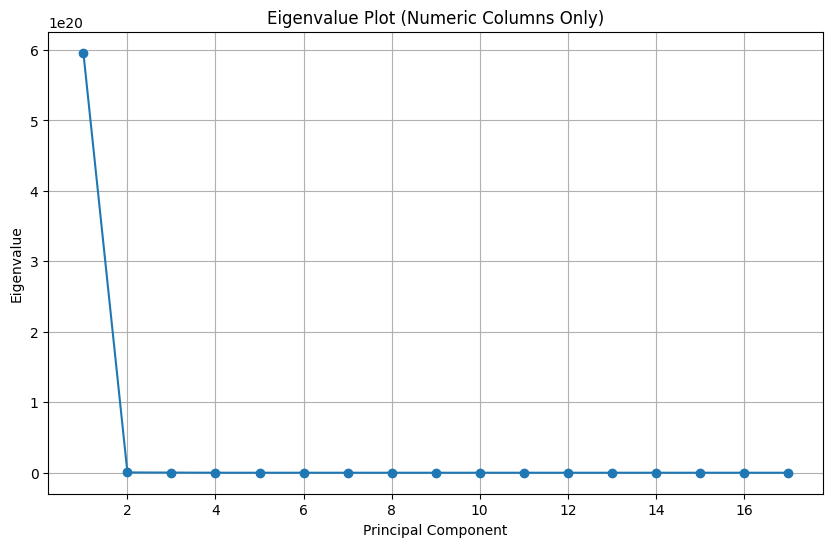

In [26]:
import numpy as np
import matplotlib.pyplot as plt
states = classes_and_RE['State']  

# Drop state column for PCA
data_numeric = classes_and_RE.drop('State', axis=1)
# Exclude the first column (states) and compute the covariance matrix
cov_matrix = np.cov(data_numeric.iloc[:, 1:].values, rowvar=False)

# Perform eigendecomposition on the covariance matrix
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Plot (Numeric Columns Only)')
plt.grid(True)
plt.show()

# A more extreme case than before

In [27]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



# Extract state column (if needed for visualization or labeling)
states = classes_and_RE['State']  

# Drop state column for PCA
data_numeric = classes_and_RE.drop('State', axis=1)

# Define the layout for the app
app = dash.Dash(__name__)

# Create a range of cluster values for the cluster slider
cluster_range = list(range(1, 11))

# Create a range of principal component values for the PCA slider
pca_range = list(range(1, min(data_numeric.shape) + 1))

# Define the app layout
app.layout = html.Div([
    html.H1("PCA Clustering with State Names"),
    dcc.Graph(id='cluster-graph'),
    html.Label('Number of Clusters'),
    dcc.Slider(
        id='cluster-slider',
        min=1,
        max=10,
        step=1,
        value=5,
        marks={i: str(i) for i in cluster_range}
    ),
    html.Label('Number of Principal Components'),
    dcc.Slider(
        id='pca-slider',
        min=1,
        max=min(data_numeric.shape),
        step=1,
        value=2,
        marks={i: str(i) for i in pca_range}
    )
])

# Define callback to update the plot based on slider values
@app.callback(
    Output('cluster-graph', 'figure'),
    [Input('cluster-slider', 'value'),
     Input('pca-slider', 'value')]
)
def update_cluster_graph(num_clusters, num_pca_components):
    # Perform PCA with the specified number of components
    pca = PCA(n_components=num_pca_components)
    pca_data = pca.fit_transform(data_numeric)

    # Perform clustering on PCA-transformed data with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(pca_data)

    # Create a DataFrame for visualization
    plot_data = {'State': states, 'Cluster': clusters}
    for i in range(1, num_pca_components + 1):
        plot_data[f'PC{i}'] = pca_data[:, i-1]

    # Create an interactive scatter plot using Plotly
    fig = px.scatter(plot_data, x=f'PC{num_pca_components}', y=f'PC1', color='Cluster', hover_name='State',
                     title=f'PCA Clustering with State Names (Clusters: {num_clusters}, Components: {num_pca_components})',
                     labels={'PC1': 'Principal Component 1', f'PC{num_pca_components}': f'Principal Component {num_pca_components}'},
                     template='plotly_white', width=800, height=600)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
    


In [28]:
#what do the clusters have in common?

# detailed look at R_E dataframe

Going to add more features related to revenue and expenses. want to see what states have similar features. how theses features can be 
changed to improve rankings. 

In [29]:
#new columns selected from R_E data
column_names = list(R_and_E.columns)
print(column_names)

#'LOCAL REVENUES SUBTOTAL', 'STATE REVENUES', 'FEDERAL REVENUES SUBTOTAL', 
#'INSTRUCTIONAL EXPENDITURES SALARIES', 'INSTRUCTIONAL EXPENDITURES SUPPLIES', 
#'TEACHER SALARIES SPECIAL EDUCATION PROGRAMS', 'TOTAL EXPENDITURES FOR EDUCATION',
#'PER PUPIL EXPENDITURES'

#TOTAL STUDENT MEMBERSHIP

['FISCAL YEAR OF SURVEY (2018)', 'AMERICAN NATIONAL STANDARDS INSTITUTE (ANSI) STATE CODE', 'POSTAL STATE ABBREVIATION CODE', 'NAME OF THE STATE OR TERRITORY', 'LOCAL REVENUES PROPERTY TAX', 'LOCAL REVENUES NONPROPERTY TAX', 'LOCAL REVENUES LOCAL GOVERNMENT PROPERTY TAX', 'LOCAL REVENUES LOCAL GOVERNMENT NONPROPERTY TAX', 'LOCAL REVENUES INDIVIDUAL TUITION', 'LOCAL REVENUES TUITION FROM LEAS', 'LOCAL REVENUES TRANSPORTATION FEES FROM INDIVIDUAL', 'LOCAL REVENUES TRANSPORTATION FEES FROM LEAS', 'LOCAL REVENUES EARNINGS ON INVESTMENTS', 'LOCAL REVENUES FOOD SERVICE', 'LOCAL REVENUES STUDENT ACTIVITIES', 'LOCAL REVENUES OTHER REVENUES', 'LOCAL REVENUES TEXTBOOK REVENUES', 'LOCAL REVENUES SUMMER SCHOOL ', 'LOCAL REVENUES SUBTOTAL', 'INTERMEDIATE REVENUES', 'STATE REVENUES', 'FEDERAL REVENUES DIRECT GRANTS', 'FEDERAL REVENUES THRU STATE ', 'FEDERAL REVENUES THRU INTERMEDIATE AGENCIES', 'FEDERAL REVENUES OTHER SOURCES', 'FEDERAL REVENUES SUBTOTAL', 'REVENUES FROM OTHER SOURCES', 'TOTAL REVEN

In [30]:
#detailed R_E data frame filter 

columns_to_select = [
    "NAME OF THE STATE OR TERRITORY",
    'LOCAL REVENUES SUBTOTAL', 'STATE REVENUES', 'FEDERAL REVENUES SUBTOTAL', 'TOTAL REVENUES FROM ALL SOURCES',
    
    'CURRENT EXPENDITURES',

    'INSTRUCTIONAL EXPENDITURES SALARIES', 'INSTRUCTIONAL EXPENDITURES SUPPLIES',

    'TEACHER SALARIES SPECIAL EDUCATION PROGRAMS', 'TOTAL EXPENDITURES FOR EDUCATION',

    
    "AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)",'PER PUPIL EXPENDITURES',

    'TOTAL STUDENT MEMBERSHIP'
    
    
]

# OLD_columns_to_select = [
#     "NAME OF THE STATE OR TERRITORY",
#     "TOTAL REVENUES FROM ALL SOURCES",
#     "CURRENT EXPENDITURES",
#     "AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)",
#     "FEDERAL REVENUES DIRECT GRANTS",
#     "INSTRUCTIONAL EXPENDITURES SALARIES"
# ]



detailed_RE = R_and_E[columns_to_select].copy()

In [31]:
detailed_RE.shape #new dimensions of detailed R_E

(56, 13)

## validating detailed R_E with classes & AP/SAT 

In [32]:
class_data_full #use as validation to confirm the student count and other such features 

validating_dataframe = pd.merge(class_data_full, detailed_RE, how='outer', left_on='State', right_on='NAME OF THE STATE OR TERRITORY')


In [33]:
validating_dataframe[['TOTAL STUDENT MEMBERSHIP', 'Total Enrollment Per State']] 

'''
The two columns are very similar in nature but will take an average of both columns
'''

'\nThe two columns are very similar in nature but will take an average of both columns\n'

In [34]:
validating_dataframe['Average_Enrollment'] = validating_dataframe[['TOTAL STUDENT MEMBERSHIP', 'Total Enrollment Per State']].mean(axis=1)

In [35]:
validating_dataframe[['Average_Enrollment']]

,Average_Enrollment
0,50922024.0
1,742712.5
2,132246.5
3,1121702.0
4,496329.0
5,6267134.0
6,910599.5
7,530327.5
8,137409.0
9,86356.0


# updated dataframe

In [36]:
updated_dataframe = validating_dataframe.copy()

In [37]:
updated_dataframe

,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Class room teachers FTE COUNT,...,TOTAL REVENUES FROM ALL SOURCES,CURRENT EXPENDITURES,INSTRUCTIONAL EXPENDITURES SALARIES,INSTRUCTIONAL EXPENDITURES SUPPLIES,TEACHER SALARIES SPECIAL EDUCATION PROGRAMS,TOTAL EXPENDITURES FOR EDUCATION,AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION),PER PUPIL EXPENDITURES,TOTAL STUDENT MEMBERSHIP,Average_Enrollment
0,"50 states, District of Columbia, and Puerto Rico",0.864471,0.848101,0.807778,0.671834,0.494813,0.868885,0.745276,0.617517,3324084.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50922024.0
1,Alabama,0.910798,0.887324,0.845070,0.767606,0.438967,0.896714,0.826291,0.596244,47512.87,...,8.012258e+09,7.214075e+09,2.602757e+09,2.877352e+08,2.517363e+08,7.996518e+09,695421.0,9544.0,742444.0,742712.5
2,Alaska,0.773973,0.657534,0.551370,0.308219,0.171233,0.613014,0.280822,0.277397,7312.09,...,2.529601e+09,2.355261e+09,7.160272e+08,6.158460e+07,-1.000000e+00,2.497071e+09,120792.0,18903.0,132872.0,132246.5
3,Arizona,0.852727,0.865455,0.845455,0.589091,0.438182,0.869091,0.660000,0.507273,60874.99,...,1.063443e+10,9.182464e+09,3.346719e+09,2.082105e+08,3.557868e+08,1.067320e+10,1013799.0,8534.0,1096727.0,1121702.0
4,Arkansas,0.934286,0.940000,0.860000,0.737143,0.288571,0.894286,0.834286,0.688571,34876.23,...,5.750621e+09,5.044098e+09,1.929132e+09,2.031442e+08,1.982868e+08,5.665380e+09,449341.0,10517.0,496085.0,496329.0
5,California,0.836253,0.712110,0.625286,0.531607,0.442879,0.789794,0.578065,0.503808,288758.57,...,9.163032e+10,7.983873e+10,2.916024e+10,2.150274e+09,3.598841e+09,8.997028e+10,6019564.0,12867.0,6304266.0,6267134.0
6,Colorado,0.866667,0.731429,0.811429,0.731429,0.472381,0.893333,0.750476,0.697143,53008.76,...,1.120834e+10,9.319502e+09,3.502852e+09,3.041843e+08,4.434583e+08,1.124373e+10,824432.0,10616.0,910280.0,910599.5
7,Connecticut,0.778462,0.735385,0.741538,0.649231,0.529231,0.772308,0.692308,0.600000,44888.72,...,1.151827e+10,1.070392e+10,3.800684e+09,9.708450e+07,4.758891e+08,1.139131e+10,510580.0,20572.0,531288.0,530327.5
8,Delaware,0.854839,0.806452,0.822581,0.645161,0.580645,0.822581,0.758065,0.629032,9621.69,...,2.221082e+09,2.082803e+09,7.781920e+08,5.559376e+07,1.360919e+08,2.273254e+09,127840.0,15799.0,136293.0,137409.0
9,District of Columbia,0.916667,0.895833,0.895833,0.812500,0.437500,0.916667,0.895833,0.708333,7142.59,...,2.549640e+09,2.022310e+09,7.699158e+08,2.516629e+07,1.383557e+08,2.479728e+09,79677.0,24752.0,87315.0,86356.0


In [38]:
for i in updated_dataframe.columns:
    print(i)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Class room teachers FTE COUNT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Total per state
Total Enrollment Per State
AP total enrollment per state
SAT-ACT Percent per state
AP enrollent Percent Per state
NAME OF THE STATE OR TERRITORY
LOCAL REVENUES SUBTOTAL
STATE REVENUES
FEDERAL REVENUES SUBTOTAL
TOTAL REVENUES FROM ALL SOURCES
CURRENT EXPENDITURES
INSTRUCTIONAL EXPENDITURES SALARIES
INSTRUCTIONAL EXPENDITURES SUPPLIES
TEACHER SALARIES SPECIAL EDUCATION PROGRAMS
TOTAL EXPENDITURES FOR EDUCATION
AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)
PER PUPIL EXPENDITURES
TOTAL STUDENT MEMBERSHIP
Average_Enrollment


## removing columns and rows

In [39]:
#removing the redundant count columns 

# Drop multiple columns in a single operation
columns_to_drop = ["Class room teachers FTE COUNT", "SAT-ACT Total per state", "Total Enrollment Per State", "AP total enrollment per state", 'TOTAL STUDENT MEMBERSHIP']
updated_dataframe.drop(columns=columns_to_drop, inplace=True)


In [40]:
updated_dataframe.shape # dimensions are relativly high still but we can reduce the dimensions using PCA and other such tenchinques

(57, 27)

In [41]:
for i in updated_dataframe.columns:
    print(i)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Percent per state
AP enrollent Percent Per state
NAME OF THE STATE OR TERRITORY
LOCAL REVENUES SUBTOTAL
STATE REVENUES
FEDERAL REVENUES SUBTOTAL
TOTAL REVENUES FROM ALL SOURCES
CURRENT EXPENDITURES
INSTRUCTIONAL EXPENDITURES SALARIES
INSTRUCTIONAL EXPENDITURES SUPPLIES
TEACHER SALARIES SPECIAL EDUCATION PROGRAMS
TOTAL EXPENDITURES FOR EDUCATION
AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)
PER PUPIL EXPENDITURES
Average_Enrollment


In [42]:
#removing the uncomparable rows 

updated_dataframe = updated_dataframe[updated_dataframe['State'] != '50 states, District of Columbia, and Puerto Rico']

excluded_territories = ["American Samoa", "Guam", "Northern Mariana Islands", "Virgin Islands"]

# Filter out rows where 'NAME OF THE STATE OR TERRITORY' is not in the excluded_territories list
updated_dataframe = updated_dataframe[~updated_dataframe['NAME OF THE STATE OR TERRITORY'].isin(excluded_territories)]

In [43]:
updated_dataframe

,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,Meeting all lic. & cert. Percent,...,FEDERAL REVENUES SUBTOTAL,TOTAL REVENUES FROM ALL SOURCES,CURRENT EXPENDITURES,INSTRUCTIONAL EXPENDITURES SALARIES,INSTRUCTIONAL EXPENDITURES SUPPLIES,TEACHER SALARIES SPECIAL EDUCATION PROGRAMS,TOTAL EXPENDITURES FOR EDUCATION,AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION),PER PUPIL EXPENDITURES,Average_Enrollment
1,Alabama,0.910798,0.887324,0.845070,0.767606,0.438967,0.896714,0.826291,0.596244,0.893793,...,8.862755e+08,8.012258e+09,7.214075e+09,2.602757e+09,2.877352e+08,2.517363e+08,7.996518e+09,695421.0,9544.0,742712.5
2,Alaska,0.773973,0.657534,0.551370,0.308219,0.171233,0.613014,0.280822,0.277397,0.992705,...,4.012412e+08,2.529601e+09,2.355261e+09,7.160272e+08,6.158460e+07,-1.000000e+00,2.497071e+09,120792.0,18903.0,132246.5
3,Arizona,0.852727,0.865455,0.845455,0.589091,0.438182,0.869091,0.660000,0.507273,0.902107,...,1.322515e+09,1.063443e+10,9.182464e+09,3.346719e+09,2.082105e+08,3.557868e+08,1.067320e+10,1013799.0,8534.0,1121702.0
4,Arkansas,0.934286,0.940000,0.860000,0.737143,0.288571,0.894286,0.834286,0.688571,0.977487,...,6.204239e+08,5.750621e+09,5.044098e+09,1.929132e+09,2.031442e+08,1.982868e+08,5.665380e+09,449341.0,10517.0,496329.0
5,California,0.836253,0.712110,0.625286,0.531607,0.442879,0.789794,0.578065,0.503808,0.975336,...,7.675653e+09,9.163032e+10,7.983873e+10,2.916024e+10,2.150274e+09,3.598841e+09,8.997028e+10,6019564.0,12867.0,6267134.0
6,Colorado,0.866667,0.731429,0.811429,0.731429,0.472381,0.893333,0.750476,0.697143,0.958300,...,7.037858e+08,1.120834e+10,9.319502e+09,3.502852e+09,3.041843e+08,4.434583e+08,1.124373e+10,824432.0,10616.0,910599.5
7,Connecticut,0.778462,0.735385,0.741538,0.649231,0.529231,0.772308,0.692308,0.600000,0.991089,...,4.940203e+08,1.151827e+10,1.070392e+10,3.800684e+09,9.708450e+07,4.758891e+08,1.139131e+10,510580.0,20572.0,530327.5
8,Delaware,0.854839,0.806452,0.822581,0.645161,0.580645,0.822581,0.758065,0.629032,0.970551,...,1.820860e+08,2.221082e+09,2.082803e+09,7.781920e+08,5.559376e+07,1.360919e+08,2.273254e+09,127840.0,15799.0,137409.0
9,District of Columbia,0.916667,0.895833,0.895833,0.812500,0.437500,0.916667,0.895833,0.708333,0.701776,...,2.081349e+08,2.549640e+09,2.022310e+09,7.699158e+08,2.516629e+07,1.383557e+08,2.479728e+09,79677.0,24752.0,86356.0
10,Florida,0.878650,0.892336,0.731752,0.670620,0.515511,0.879562,0.617701,0.397810,0.970676,...,3.432323e+09,3.011722e+10,2.737105e+10,9.695253e+09,6.000178e+08,1.886149e+09,3.027242e+10,2717544.0,9422.0,2832060.0


In [44]:
#removing "NAME OF THE STATE OR TERRITORY"

updated_dataframe.drop("NAME OF THE STATE OR TERRITORY", inplace =True, axis =1)

In [45]:
updated_dataframe.shape

(52, 26)

In [46]:
for i in updated_dataframe.columns:
    print(i)

State
Algebra I PERCENT
Geometry PERCENT
ALgebra II PERCENT
Adv. Math 1 PERCENT
Calculus PERCENT
Biology Classes PERCENT
Chemistry Classes Percent
Physics  Classes PERCENT
Meeting all lic. & cert. Percent
First year of teaching PERCENT
Second year of teaching PERCENT
SAT-ACT Percent per state
AP enrollent Percent Per state
LOCAL REVENUES SUBTOTAL
STATE REVENUES
FEDERAL REVENUES SUBTOTAL
TOTAL REVENUES FROM ALL SOURCES
CURRENT EXPENDITURES
INSTRUCTIONAL EXPENDITURES SALARIES
INSTRUCTIONAL EXPENDITURES SUPPLIES
TEACHER SALARIES SPECIAL EDUCATION PROGRAMS
TOTAL EXPENDITURES FOR EDUCATION
AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)
PER PUPIL EXPENDITURES
Average_Enrollment


## Replicating eigenvalue plots

c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



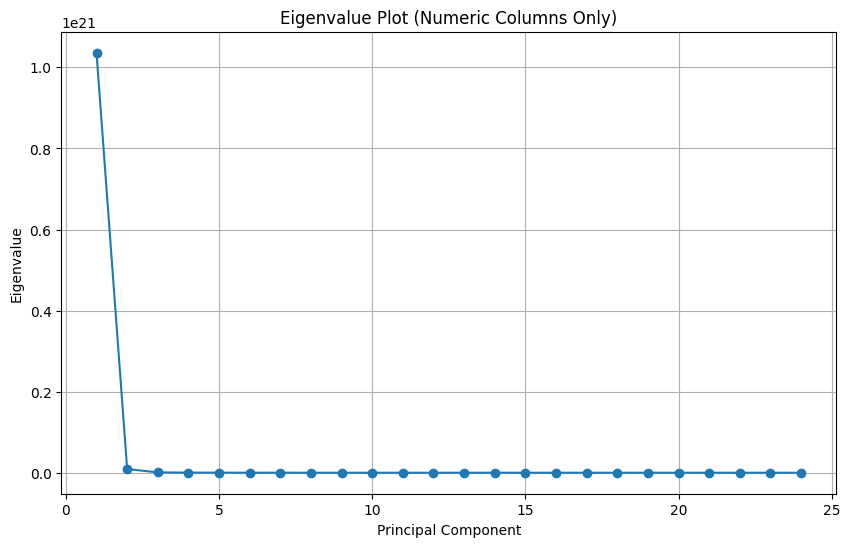

In [47]:
import numpy as np
import matplotlib.pyplot as plt
states = updated_dataframe['State']  

# Drop state column for PCA
data_numeric = updated_dataframe.drop('State', axis=1)
# Exclude the first column (states) and compute the covariance matrix
cov_matrix = np.cov(data_numeric.iloc[:, 1:].values, rowvar=False)

# Perform eigendecomposition on the covariance matrix
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalue Plot (Numeric Columns Only)')
plt.grid(True)
plt.show()

In [48]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output



# Extract state column (if needed for visualization or labeling)
states = updated_dataframe['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = updated_dataframe.drop('State', axis=1)

# Define the layout for the app
app = dash.Dash(__name__)

# Create a range of cluster values for the cluster slider
cluster_range = list(range(1, 11))

# Create a range of principal component values for the PCA slider
pca_range = list(range(1, min(data_numeric.shape) + 1))

# Define the app layout
app.layout = html.Div([
    html.H1("PCA Clustering with State Names"),
    dcc.Graph(id='cluster-graph'),
    html.Label('Number of Clusters'),
    dcc.Slider(
        id='cluster-slider',
        min=1,
        max=10,
        step=1,
        value=5,
        marks={i: str(i) for i in cluster_range}
    ),
    html.Label('Number of Principal Components'),
    dcc.Slider(
        id='pca-slider',
        min=1,
        max=min(data_numeric.shape),
        step=1,
        value=2,
        marks={i: str(i) for i in pca_range}
    )
])

# Define callback to update the plot based on slider values
@app.callback(
    Output('cluster-graph', 'figure'),
    [Input('cluster-slider', 'value'),
     Input('pca-slider', 'value')]
)
def update_cluster_graph(num_clusters, num_pca_components):
    # Perform PCA with the specified number of components
    pca = PCA(n_components=num_pca_components)
    pca_data = pca.fit_transform(data_numeric)

    # Perform clustering on PCA-transformed data with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit_predict(pca_data)

    # Create a DataFrame for visualization
    plot_data = {'State': states, 'Cluster': clusters}
    for i in range(1, num_pca_components + 1):
        plot_data[f'PC{i}'] = pca_data[:, i-1]

    # Create an interactive scatter plot using Plotly
    fig = px.scatter(plot_data, x=f'PC{num_pca_components}', y=f'PC1', color='Cluster', hover_name='State',
                     title=f'PCA Clustering with State Names (Clusters: {num_clusters}, Components: {num_pca_components})',
                     labels={'PC1': 'Principal Component 1', f'PC{num_pca_components}': f'Principal Component {num_pca_components}'},
                     template='plotly_white', width=800, height=600)

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
    


# IN REPORT

# dividing up the columns by their nature

### Want to address the discrepency of proportions and the revenue/ expense information

### exploring cluster similarities 
want to divide the updated dataframe into types of plots and compare these to the PCA plots that were above: 
1. class and test proportions
2. revenues & expenses 
3. support
'Meeting all lic. & cert. Percent'
First year of teaching PERCENT
Second year of teaching PERCENT

In [49]:
#class and test proportions=


class_list_features_list = ['State','Algebra I PERCENT',
'Geometry PERCENT',
'ALgebra II PERCENT',
'Adv. Math 1 PERCENT',
'Calculus PERCENT',
'Biology Classes PERCENT',
'Chemistry Classes Percent',
'Physics  Classes PERCENT',
'SAT-ACT Percent per state',
'AP enrollent Percent Per state']



In [50]:
#revenues & expenses 

revenue_and_expenses_features_list = [ 'State','LOCAL REVENUES SUBTOTAL',
'STATE REVENUES',
'FEDERAL REVENUES SUBTOTAL',
'TOTAL REVENUES FROM ALL SOURCES',
'CURRENT EXPENDITURES',
'INSTRUCTIONAL EXPENDITURES SALARIES',
'INSTRUCTIONAL EXPENDITURES SUPPLIES',
'TEACHER SALARIES SPECIAL EDUCATION PROGRAMS',
'TOTAL EXPENDITURES FOR EDUCATION']


In [51]:
support_features_list = [
'State','AVERAGE DAILY ATTENDANCE (STATE AND NCES DEFINITION)',
'PER PUPIL EXPENDITURES',
'Average_Enrollment']

In [52]:
#updated_dataframe

class_features_df = updated_dataframe[class_list_features_list].copy()
revenue_and_expenses_df = updated_dataframe[revenue_and_expenses_features_list].copy()
support_features_df = updated_dataframe[support_features_list].copy()

# power point

In [53]:
class_features_df

,State,Algebra I PERCENT,Geometry PERCENT,ALgebra II PERCENT,Adv. Math 1 PERCENT,Calculus PERCENT,Biology Classes PERCENT,Chemistry Classes Percent,Physics Classes PERCENT,SAT-ACT Percent per state,AP enrollent Percent Per state
1,Alabama,0.910798,0.887324,0.845070,0.767606,0.438967,0.896714,0.826291,0.596244,0.083069,0.045043
2,Alaska,0.773973,0.657534,0.551370,0.308219,0.171233,0.613014,0.280822,0.277397,0.037031,0.034090
3,Arizona,0.852727,0.865455,0.845455,0.589091,0.438182,0.869091,0.660000,0.507273,0.053173,0.052578
4,Arkansas,0.934286,0.940000,0.860000,0.737143,0.288571,0.894286,0.834286,0.688571,0.093932,0.060724
5,California,0.836253,0.712110,0.625286,0.531607,0.442879,0.789794,0.578065,0.503808,0.055120,0.072993
6,Colorado,0.866667,0.731429,0.811429,0.731429,0.472381,0.893333,0.750476,0.697143,0.072101,0.065273
7,Connecticut,0.778462,0.735385,0.741538,0.649231,0.529231,0.772308,0.692308,0.600000,0.089467,0.067586
8,Delaware,0.854839,0.806452,0.822581,0.645161,0.580645,0.822581,0.758065,0.629032,0.071020,0.080282
9,District of Columbia,0.916667,0.895833,0.895833,0.812500,0.437500,0.916667,0.895833,0.708333,0.071408,0.057871
10,Florida,0.878650,0.892336,0.731752,0.670620,0.515511,0.879562,0.617701,0.397810,0.094928,0.074253


## class offerings

class Features


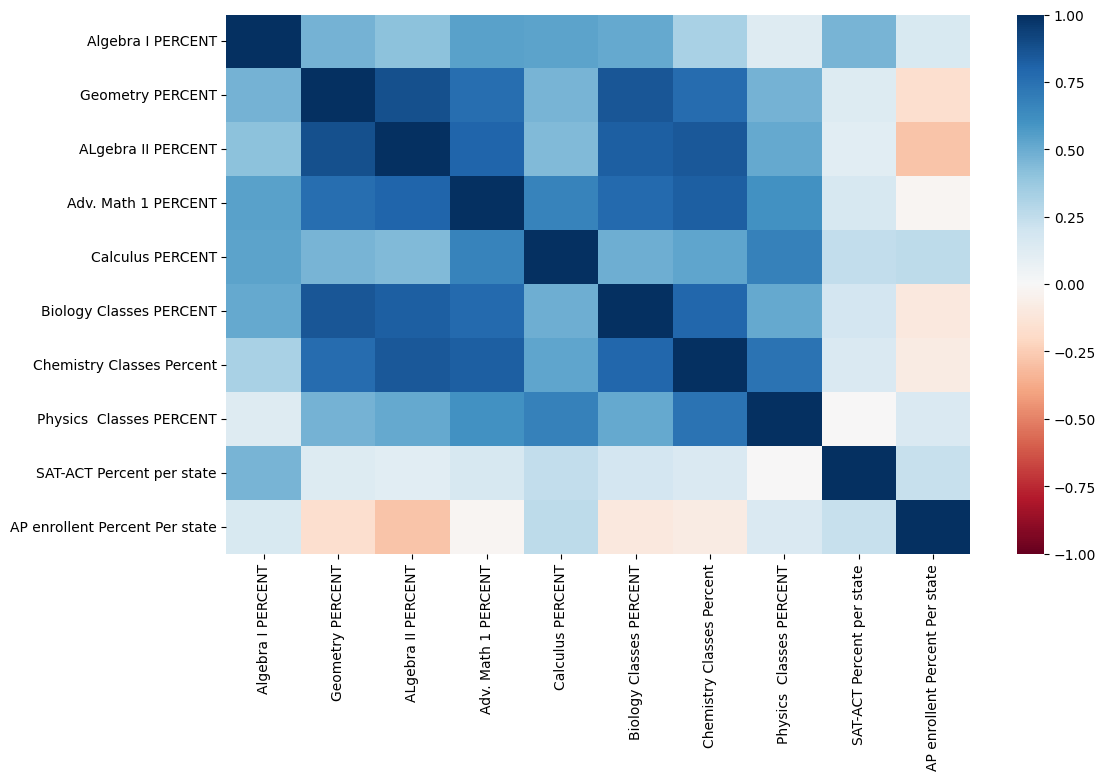

In [54]:
import seaborn as sns

# Drop state column for correlation matrix
numeric_class_features = class_features_df.drop('State', axis=1)

plt.figure(figsize= (12,7))
sns.heatmap(numeric_class_features.corr(), cmap= "RdBu", vmin= -1, vmax= 1) 
print("class Features")



using the columns above how are the states compared to eachother using PCA?

In [55]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output


# Extract state column (if needed for visualization or labeling)
states = class_features_df['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = class_features_df.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='PCA Clustering with class_features', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()


how are each column related to the rest?

In [56]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming class_features_df is already defined and contains the necessary data
# Drop the 'State' column if it exists, otherwise, drop any non-numeric columns
data_numeric = class_features_df.drop('State', axis=1, errors='ignore')

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric.T)  # Transpose to perform PCA on columns

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'Feature': data_numeric.columns
})

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Add cluster information to the DataFrame
plot_data['Cluster'] = clusters

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='Feature', 
                 title='PCA Clustering with class_features', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)



# Show the plot
fig.show()


## revenue and expenses

Revenue and expenses


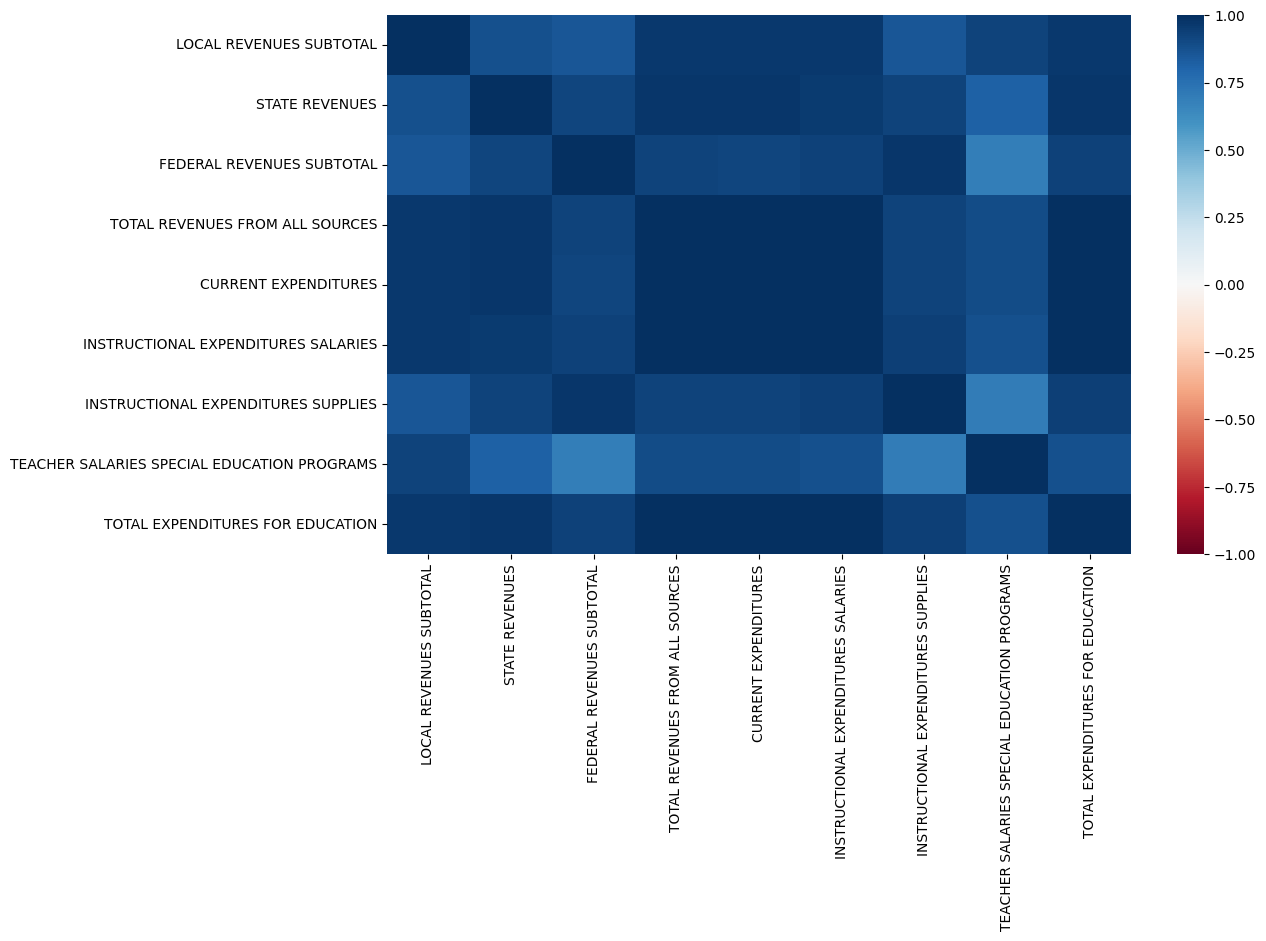

In [57]:
numeric_revenue_and_expenses_features = revenue_and_expenses_df.drop('State', axis=1)

plt.figure(figsize= (12,7))
sns.heatmap(numeric_revenue_and_expenses_features.corr(), cmap= "RdBu", vmin= -1, vmax= 1) 
print("Revenue and expenses")

In [58]:
# Extract state column (if needed for visualization or labeling)
states = revenue_and_expenses_df['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = revenue_and_expenses_df.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='PCA Clustering with revenue_and_expenses', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()

In [59]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming class_features_df is already defined and contains the necessary data
# Drop the 'State' column if it exists, otherwise, drop any non-numeric columns
data_numeric = revenue_and_expenses_df.drop('State', axis=1, errors='ignore')

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric.T)  # Transpose to perform PCA on columns

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'Feature': data_numeric.columns
})

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Add cluster information to the DataFrame
plot_data['Cluster'] = clusters

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='Feature', 
                 title='PCA Clustering with revenue_and_expenses_df', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()


## support features

support Features


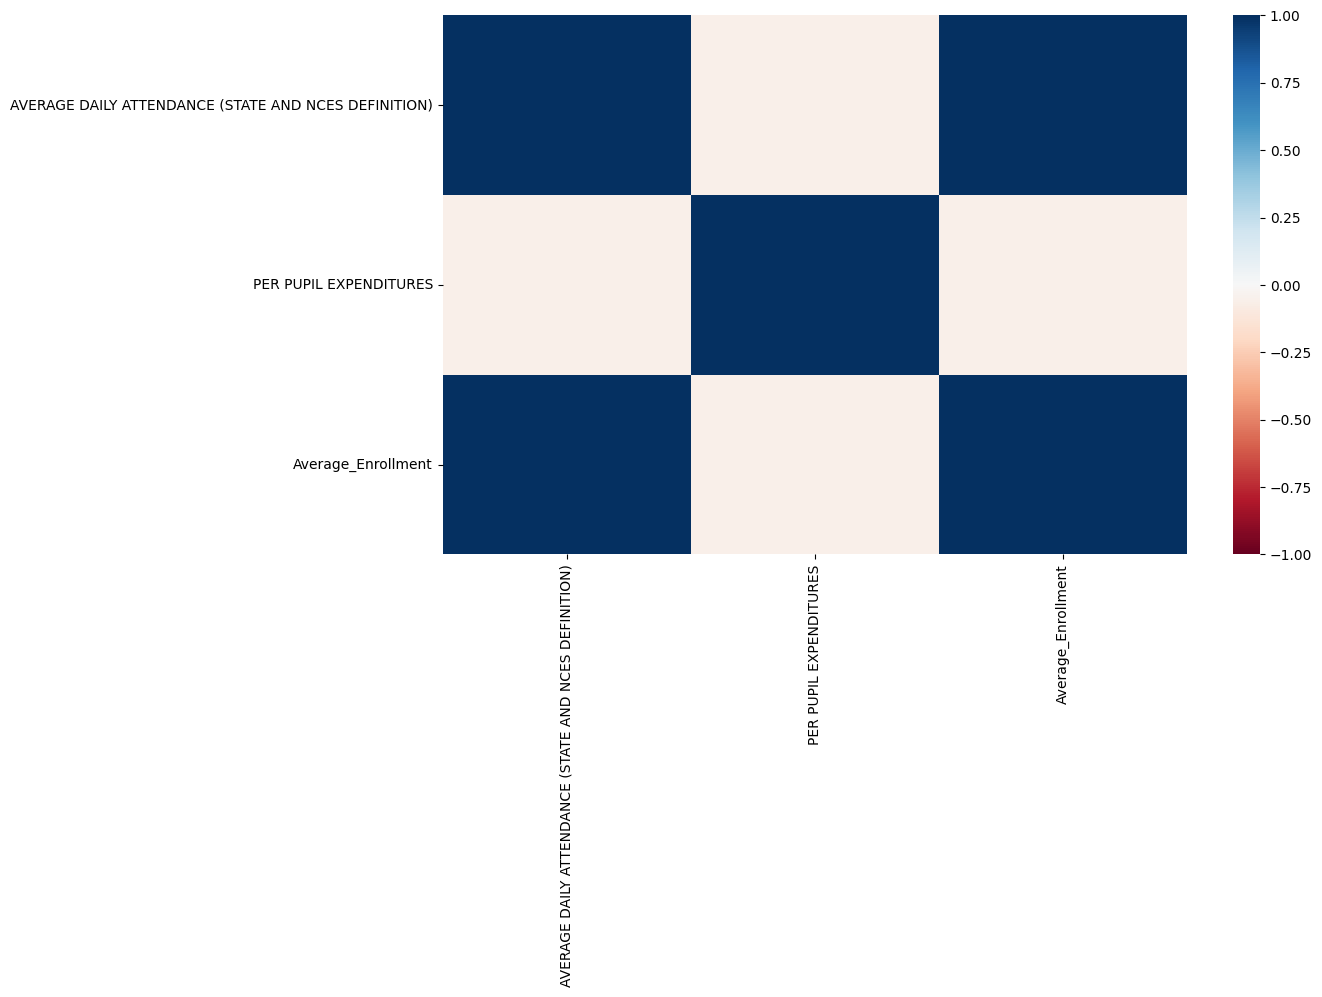

In [60]:
numeric_support_features = support_features_df.drop('State', axis=1)


plt.figure(figsize= (12,7))
sns.heatmap(numeric_support_features.corr(), cmap= "RdBu", vmin= -1, vmax= 1) 
print("support Features")

In [61]:
# Extract state column (if needed for visualization or labeling)
states = support_features_df['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = support_features_df.drop('State', axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric)

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='PCA Clustering with support_features', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()

In [62]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Assuming class_features_df is already defined and contains the necessary data
# Drop the 'State' column if it exists, otherwise, drop any non-numeric columns
data_numeric = support_features_df.drop('State', axis=1, errors='ignore')

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_numeric.T)  # Transpose to perform PCA on columns

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': pca_data[:, 0],
    'PC2': pca_data[:, 1],
    'Feature': data_numeric.columns
})

# Perform clustering on PCA-transformed data
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

# Add cluster information to the DataFrame
plot_data['Cluster'] = clusters

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='Feature', 
                 title='PCA Clustering with support_features_df', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()


# 8/13/2024 nonlinear PCA, logistic, ANOVA mixture

## kernal PCA

### class offerings 

In [63]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# Extract state column (if needed for visualization or labeling)
states = class_features_df['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = class_features_df.drop('State', axis=1)

# Perform Kernel PCA with a non-linear kernel (e.g., 'rbf')
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can try other kernels like 'poly', 'sigmoid', etc.
kpca_data = kpca.fit_transform(data_numeric)

# Perform clustering on Kernel PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(kpca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': kpca_data[:, 0],
    'PC2': kpca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='Kernel PCA Clustering with class_features', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()


### revenue and expenses 

In [64]:
states = revenue_and_expenses_df['State']  


data_numeric = revenue_and_expenses_df.drop('State', axis=1)


import plotly.express as px
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

states = revenue_and_expenses_df['State']  


data_numeric = revenue_and_expenses_df.drop('State', axis=1)


# Perform Kernel PCA with a non-linear kernel (e.g., 'rbf')
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can try other kernels like 'poly', 'sigmoid', etc.
kpca_data = kpca.fit_transform(data_numeric)

# Perform clustering on Kernel PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(kpca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': kpca_data[:, 0],
    'PC2': kpca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='Kernel PCA Clustering with class_features', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()

### support features

In [65]:
states = support_features_df['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = support_features_df.drop('State', axis=1)


import plotly.express as px
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

states = revenue_and_expenses_df['State']  


data_numeric = revenue_and_expenses_df.drop('State', axis=1)


# Perform Kernel PCA with a non-linear kernel (e.g., 'rbf')
kpca = KernelPCA(n_components=2, kernel='rbf')  # You can try other kernels like 'poly', 'sigmoid', etc.
kpca_data = kpca.fit_transform(data_numeric)

# Perform clustering on Kernel PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(kpca_data)

# Create a DataFrame for visualization
plot_data = pd.DataFrame({
    'PC1': kpca_data[:, 0],
    'PC2': kpca_data[:, 1],
    'State': states,
    'Cluster': clusters
})

# Create an interactive scatter plot using Plotly
fig = px.scatter(plot_data, x='PC1', y='PC2', color='Cluster', hover_name='State', 
                 title='Kernel PCA Clustering with class_features', labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 template='plotly_white', width=800, height=600)

# Show the plot
fig.show()

## Logistic with Kernal dimension to generate clusters

Kernel PCA: First, we perform a non-linear PCA to reduce dimensionality.
KMeans Clustering: We cluster the data and use the cluster labels as a pseudo-target variable.
Logistic Regression: We then perform logistic regression using the original features to predict these cluster labels.
Insights:
The logistic regression model will help you understand which features (i.e., class offerings) are most predictive of belonging to a certain cluster.
Significant coefficients (from logit_model.summary()) will show which class offerings contribute most to the cluster assignment, providing insight into beneficial combinations of class offerings.

work around since the data in not binary is to use a multicnomial logistic regression approach 

### class offerings

In [96]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import numpy as np

np.random.seed(42)
# Extract state column (if needed for visualization or labeling)
states = class_features_df['State']

# Drop state column for PCA
data_numeric = class_features_df.drop('State', axis=1)

# Perform Kernel PCA with a non-linear kernel (e.g., 'rbf')
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca_data = kpca.fit_transform(data_numeric)

# Perform clustering on Kernel PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(kpca_data)

# Initialize and fit a multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(data_numeric, clusters)

# Coefficients and their importance
print("Feature coefficients:\n", log_reg.coef_)



Feature coefficients:
 [[ 0.38044435  0.42231177  0.54701081  0.77591804  1.50527011  0.34214768
   0.67131929  1.18127558 -0.02227521 -0.06737613]
 [-0.03080897 -0.35532407 -0.37475958 -0.69480063 -0.89269298 -0.24717631
  -0.64199203 -1.41785733  0.03803823 -0.02201017]
 [-0.07250913 -0.19357131 -0.27216225 -0.36478842 -0.30917072 -0.25356736
  -0.46425415 -0.32197616 -0.03539483 -0.01706647]
 [ 0.45333105  0.12199505  0.08145167  0.43620726  0.1185155   0.18728026
   0.37794916  0.43540928  0.09082011  0.13688466]
 [-0.7304573   0.00458857  0.01845935 -0.15253625 -0.42192192 -0.02868427
   0.05697774  0.12314864 -0.07118829 -0.03043189]]


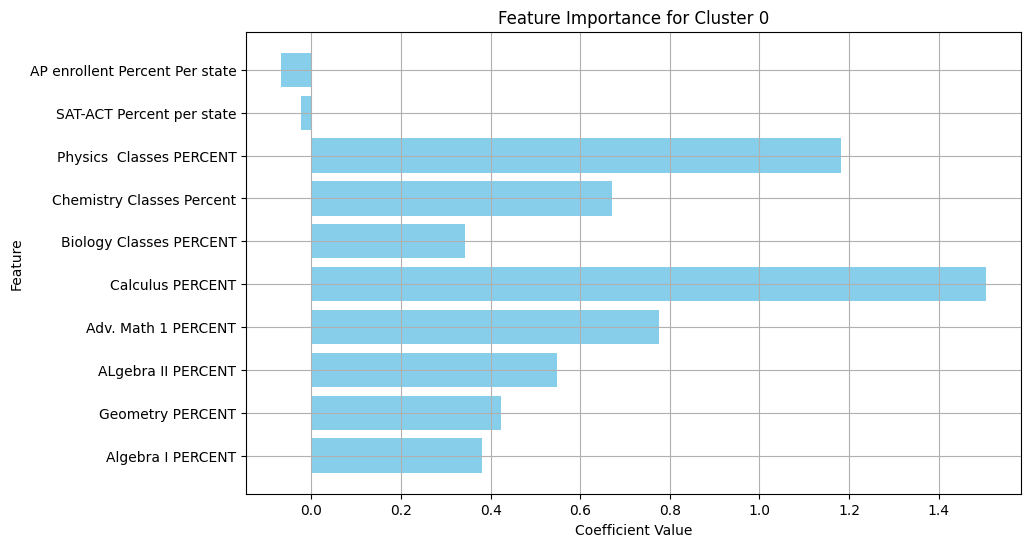

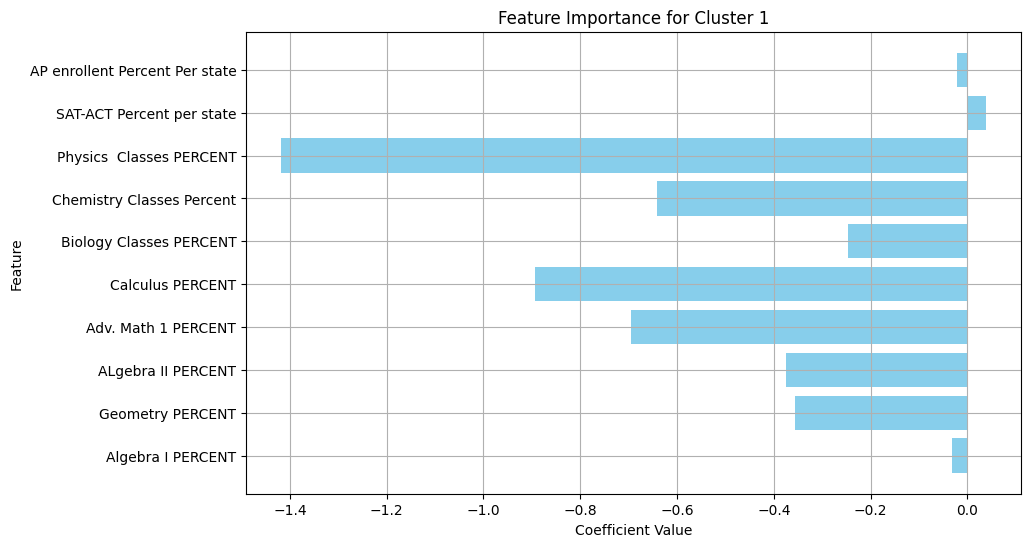

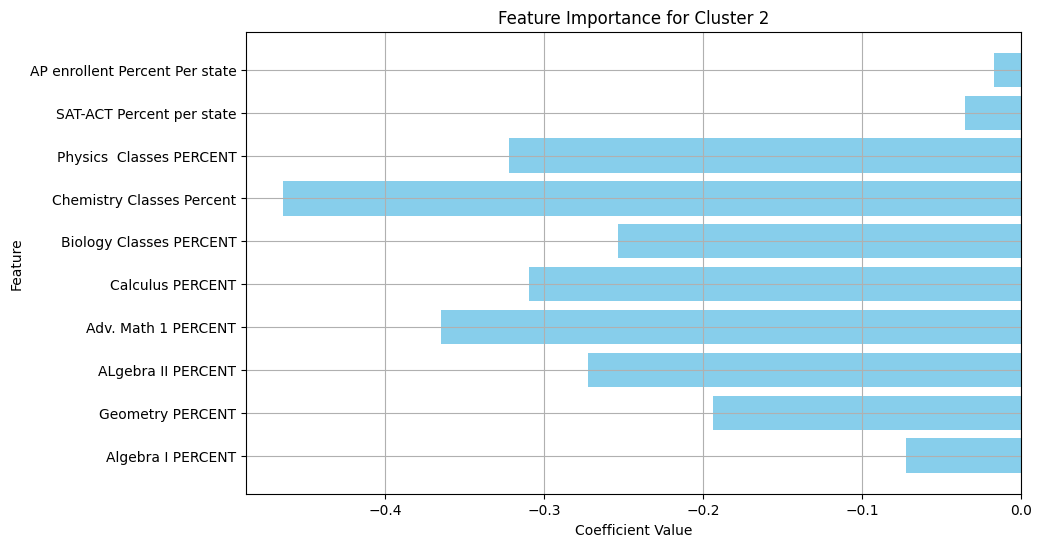

KeyboardInterrupt: 

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming log_reg is the fitted LogisticRegression model
# Get the feature names
feature_names = data_numeric.columns

# Plot the coefficients for each cluster
n_classes = log_reg.coef_.shape[0]
for i in range(n_classes):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, log_reg.coef_[i], color='skyblue')
    plt.title(f'Feature Importance for Cluster {i}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.show()


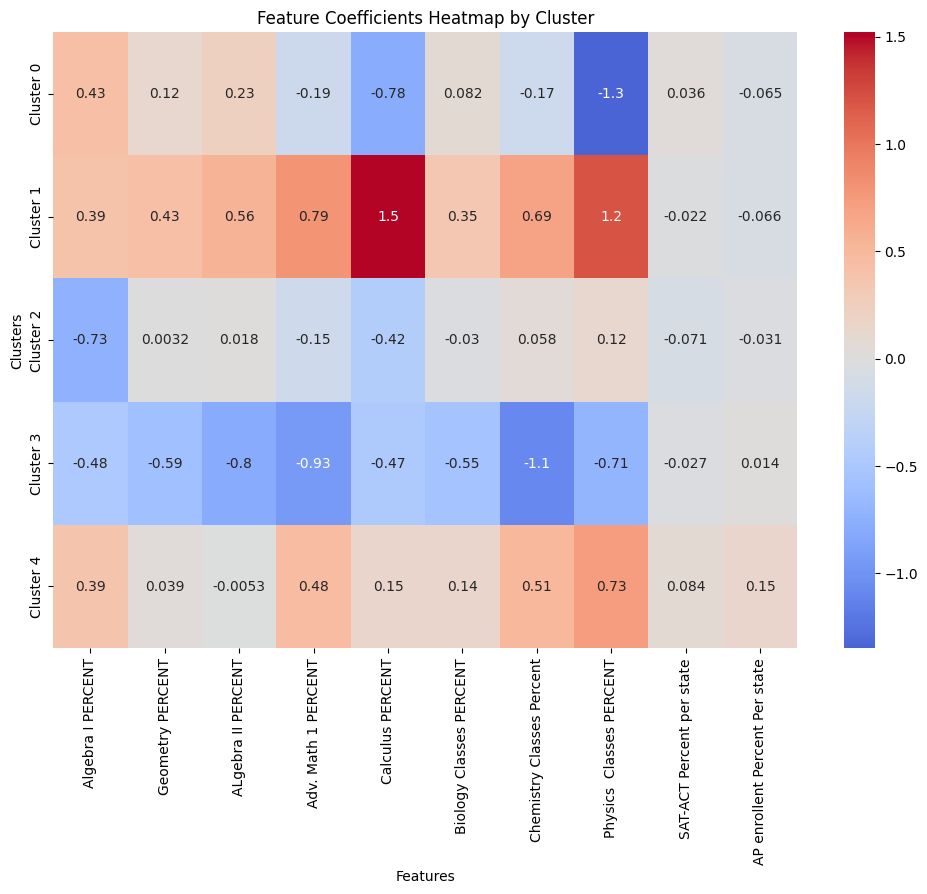

In [68]:
import seaborn as sns
import pandas as pd

# Create a DataFrame from the coefficients for better visualization
coefficients_df = pd.DataFrame(log_reg.coef_, columns=feature_names)
coefficients_df.index = [f'Cluster {i}' for i in range(n_classes)]

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(coefficients_df, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Coefficients Heatmap by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()


## revenue and expenses

Feature coefficients:
 [[ 1.64215888e-09  2.26205728e-09 -2.87369413e-09 -8.23303073e-10
  -6.34790269e-10  9.87630333e-10 -9.49421698e-10 -2.72656510e-09
  -1.90229258e-10]
 [-1.10054039e-09 -1.25194988e-09  1.43636155e-09  3.27834021e-10
  -7.52415319e-10 -8.73766667e-10 -2.35500397e-10 -6.93634021e-10
   1.46188681e-09]
 [ 3.64667236e-10 -2.42366886e-10 -8.53232363e-11 -9.25554193e-10
   1.76817911e-09 -1.45065559e-09  8.61831407e-12 -7.61013465e-10
   2.87727370e-11]
 [-5.12225832e-10 -8.23032733e-10  2.42752134e-10 -2.11094945e-10
  -1.26850242e-10  1.27710732e-10  1.41297843e-10 -2.17342104e-10
   5.01232737e-10]
 [-3.94059895e-10  5.52922268e-11  1.27990368e-09  1.63211819e-09
  -2.54123284e-10  1.20908119e-09  1.03500594e-09  4.39855469e-09
  -1.80166302e-09]]


c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



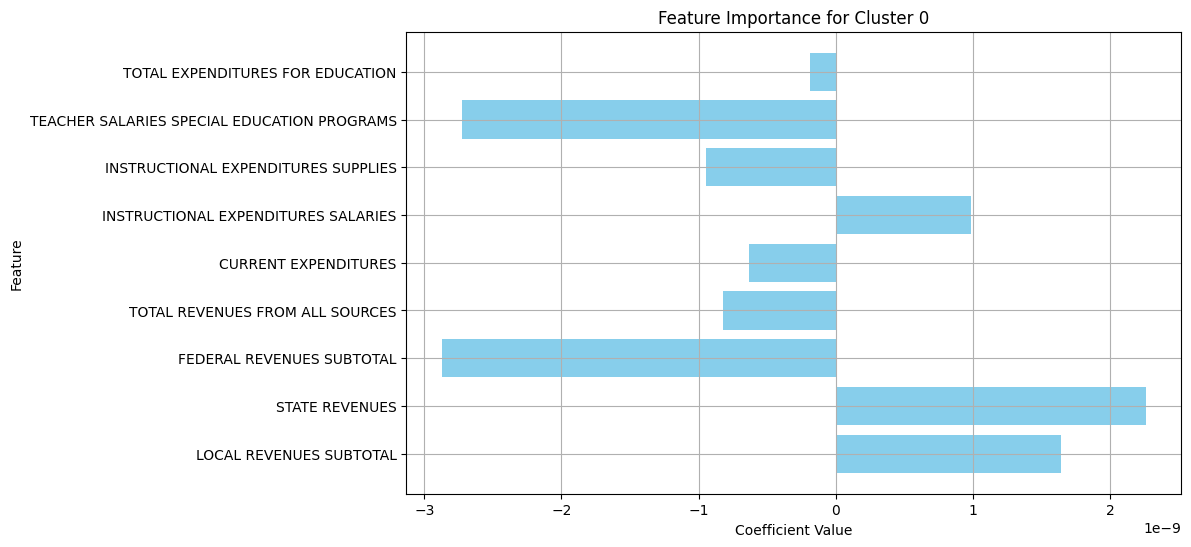

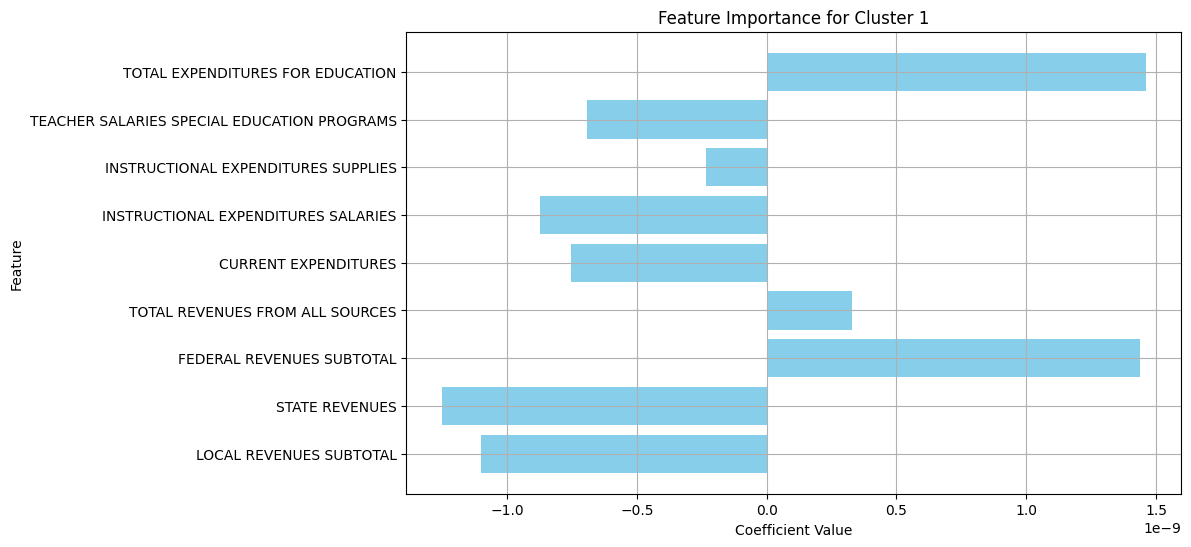

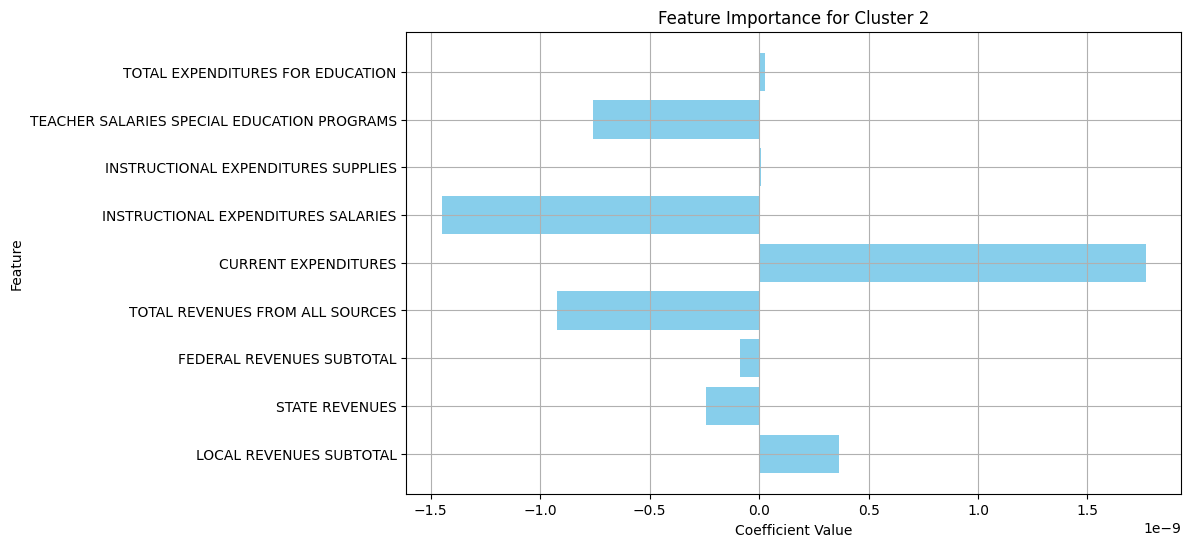

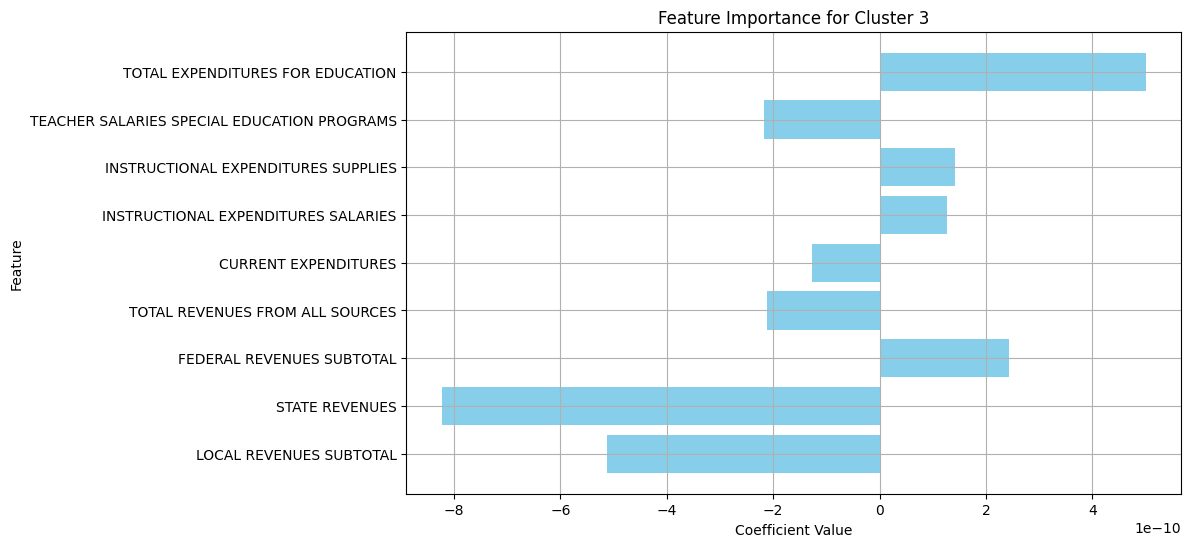

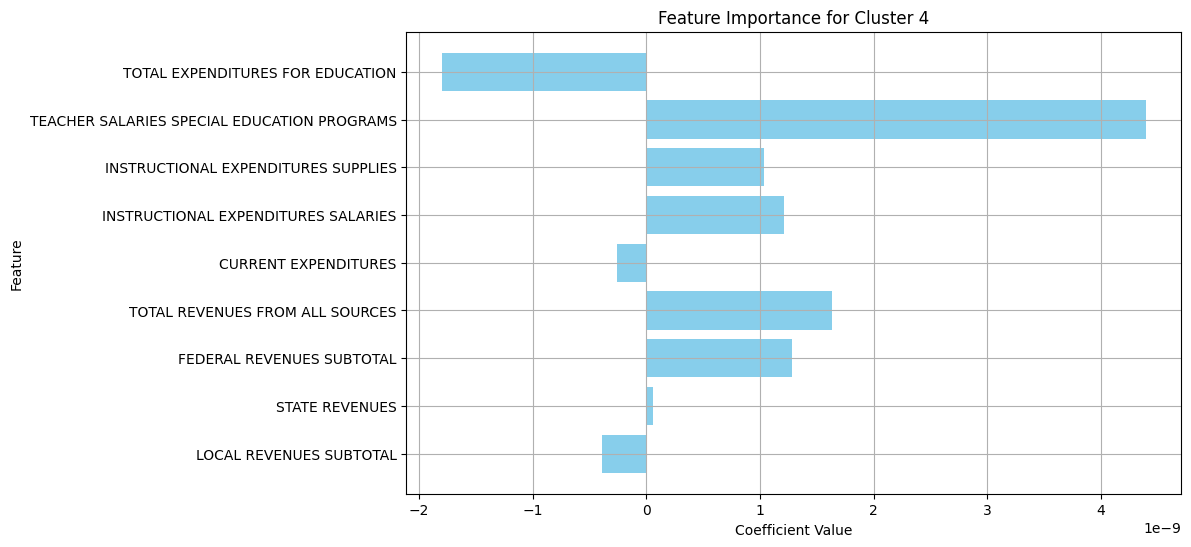

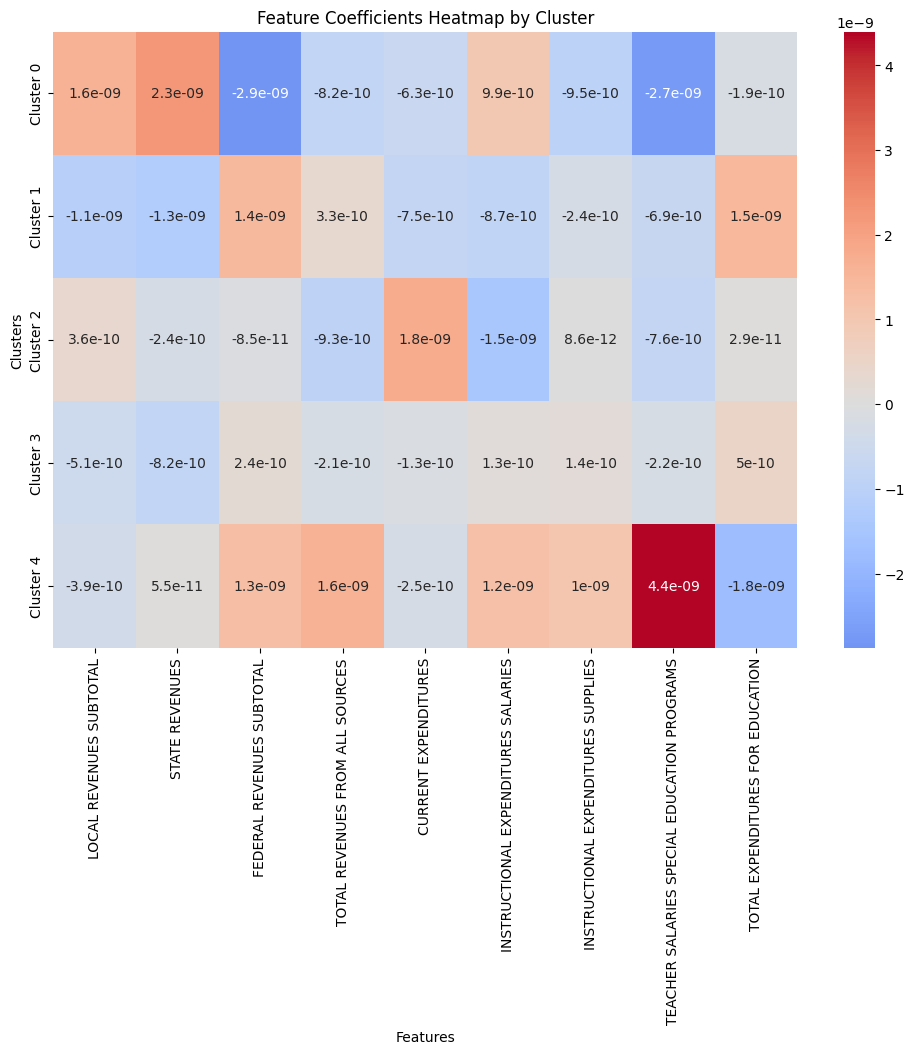

In [69]:
states = revenue_and_expenses_df['State']  # Assuming 'State' is the name of the column containing state information

# Drop state column for PCA
data_numeric = revenue_and_expenses_df.drop('State', axis=1)

# Perform Kernel PCA with a non-linear kernel (e.g., 'rbf')
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca_data = kpca.fit_transform(data_numeric)

# Perform clustering on Kernel PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(kpca_data)

# Initialize and fit a multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(data_numeric, clusters)

# Coefficients and their importance
print("Feature coefficients:\n", log_reg.coef_)



import matplotlib.pyplot as plt
import numpy as np

# Assuming log_reg is the fitted LogisticRegression model
# Get the feature names
feature_names = data_numeric.columns

# Plot the coefficients for each cluster
n_classes = log_reg.coef_.shape[0]
for i in range(n_classes):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, log_reg.coef_[i], color='skyblue')
    plt.title(f'Feature Importance for Cluster {i}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.show()



import seaborn as sns
import pandas as pd

# Create a DataFrame from the coefficients for better visualization
coefficients_df = pd.DataFrame(log_reg.coef_, columns=feature_names)
coefficients_df.index = [f'Cluster {i}' for i in range(n_classes)]

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(coefficients_df, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Coefficients Heatmap by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

# support features

Feature coefficients:
 [[ 2.60969941e-05  6.41722642e-05 -2.28020274e-05]
 [-9.45046468e-06 -8.38734062e-06  3.05677196e-06]
 [-4.05646298e-05 -9.61748789e-05  3.81702214e-05]
 [ 5.50672279e-06  1.05227387e-05 -3.04300479e-06]
 [ 1.84113776e-05  2.98672166e-05 -1.53819611e-05]]


c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



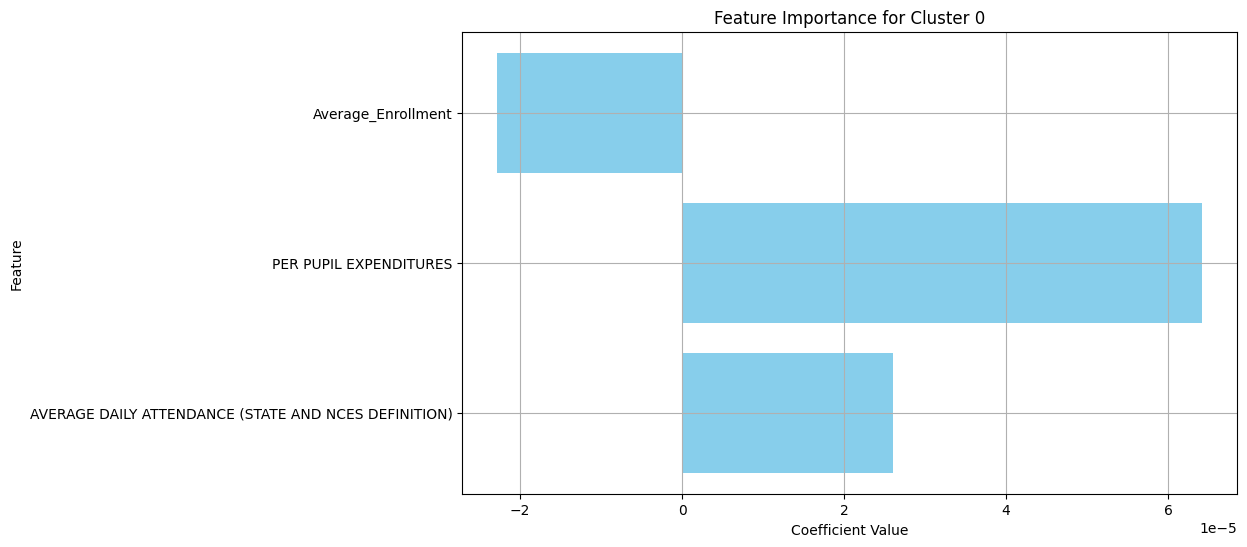

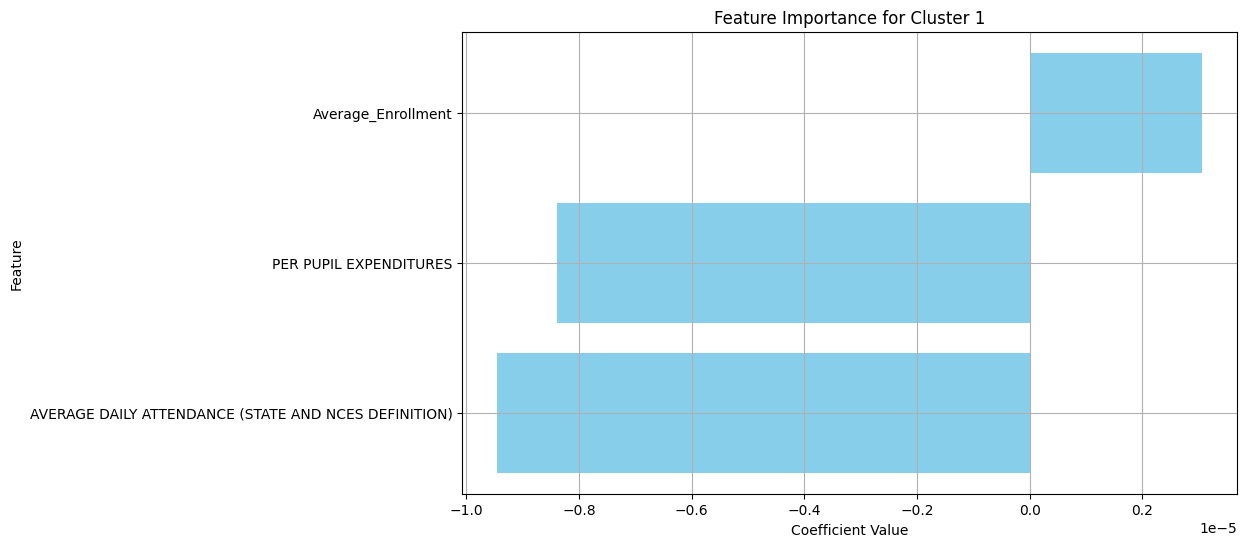

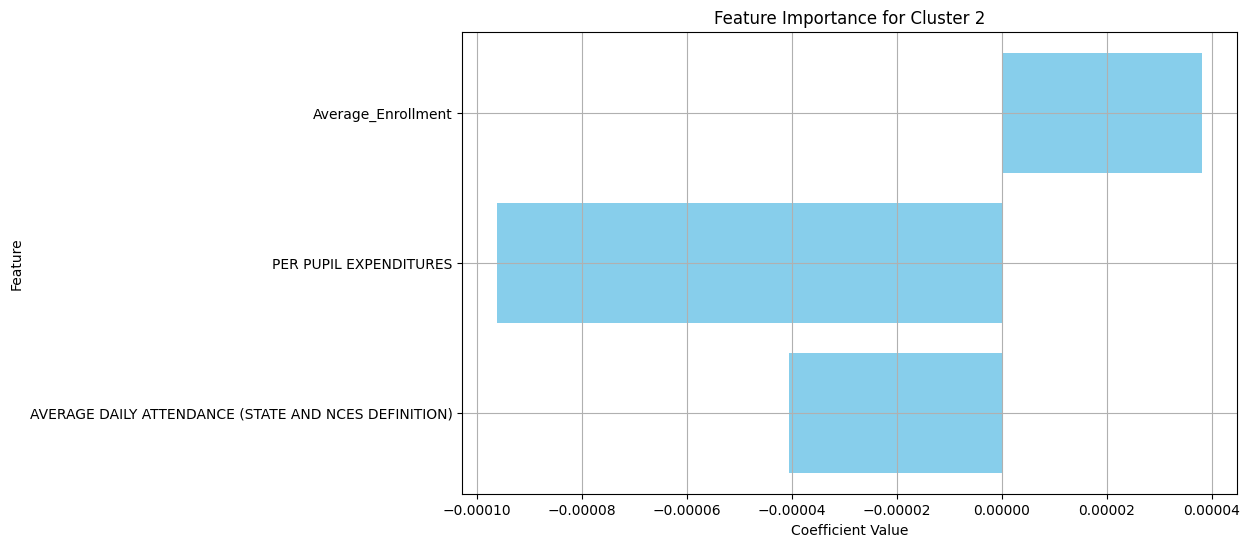

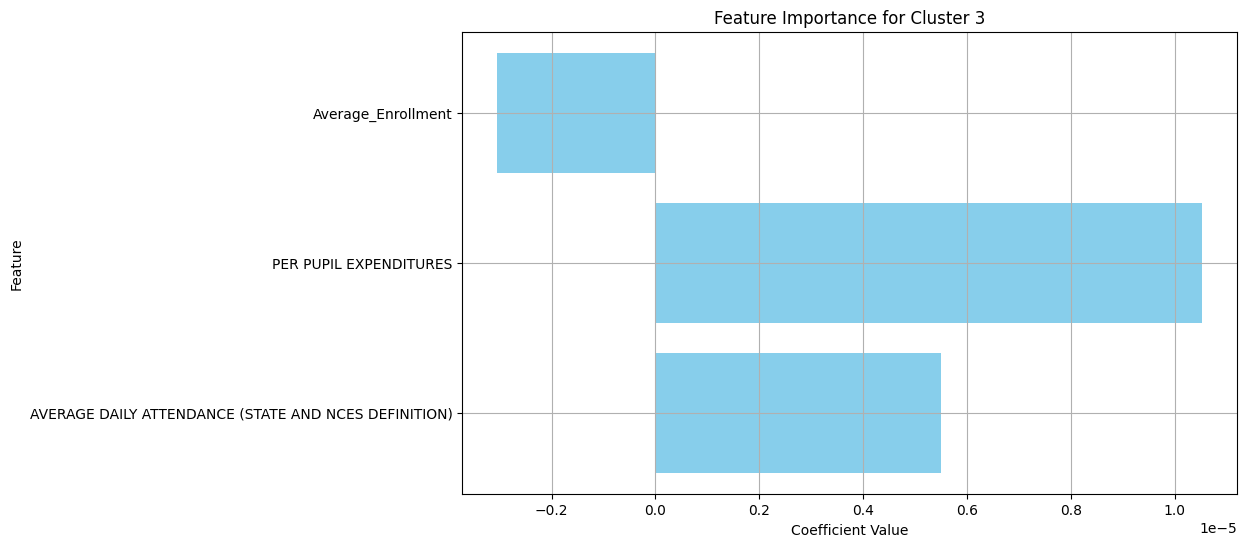

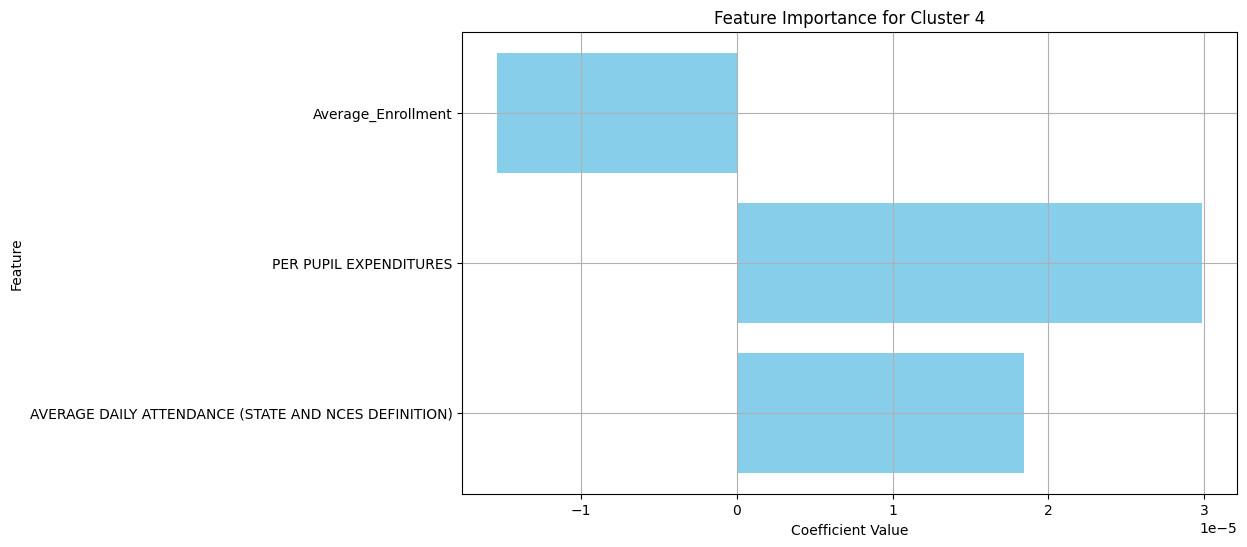

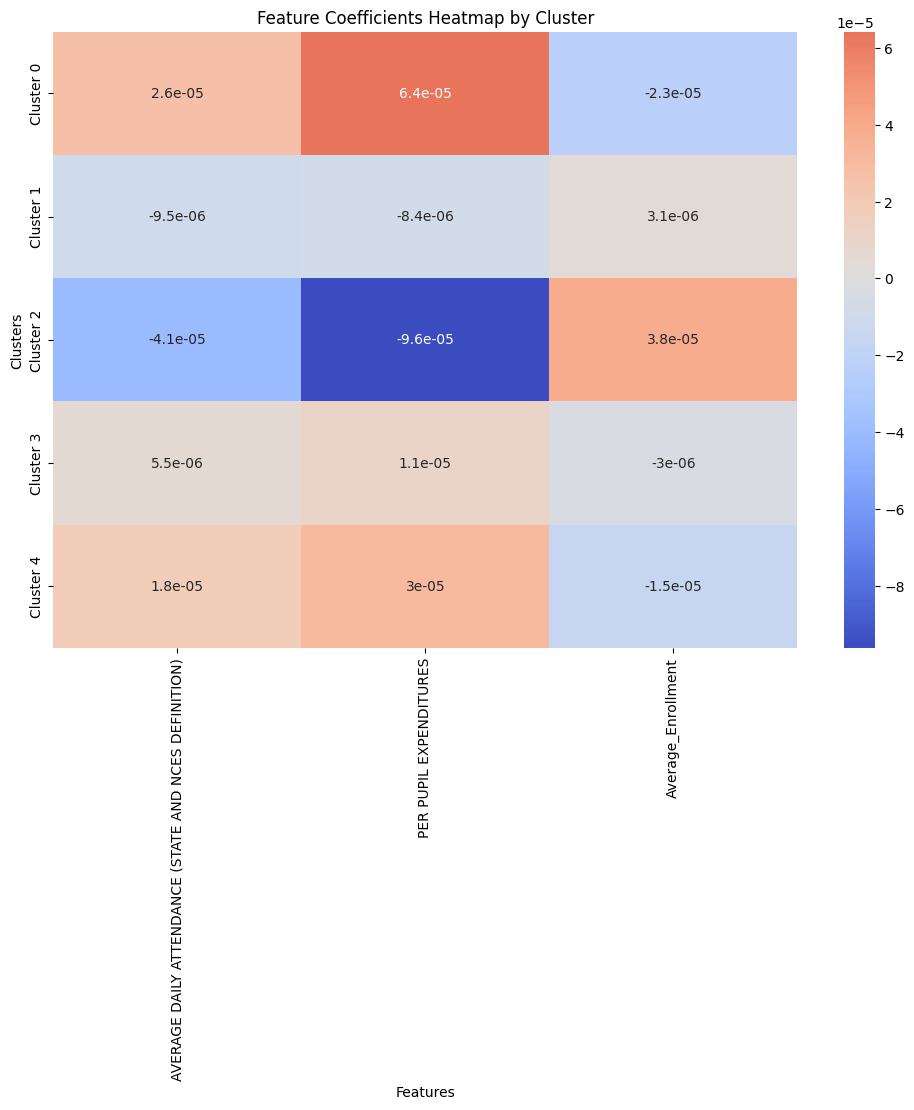

In [70]:
states = support_features_df['State']  

# Drop state column for PCA
data_numeric = support_features_df.drop('State', axis=1)

# Perform Kernel PCA with a non-linear kernel (e.g., 'rbf')
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca_data = kpca.fit_transform(data_numeric)

# Perform clustering on Kernel PCA-transformed data
kmeans = KMeans(n_clusters=5)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(kpca_data)

# Initialize and fit a multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(data_numeric, clusters)

# Coefficients and their importance
print("Feature coefficients:\n", log_reg.coef_)



import matplotlib.pyplot as plt
import numpy as np

# Assuming log_reg is the fitted LogisticRegression model
# Get the feature names
feature_names = data_numeric.columns

# Plot the coefficients for each cluster
n_classes = log_reg.coef_.shape[0]
for i in range(n_classes):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, log_reg.coef_[i], color='skyblue')
    plt.title(f'Feature Importance for Cluster {i}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.show()



import seaborn as sns
import pandas as pd

# Create a DataFrame from the coefficients for better visualization
coefficients_df = pd.DataFrame(log_reg.coef_, columns=feature_names)
coefficients_df.index = [f'Cluster {i}' for i in range(n_classes)]

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(coefficients_df, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Coefficients Heatmap by Cluster')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

## need to be done still 
Manifold, TSNE, mixture model, simultaneous PCA, Ranking with other reports, How can I turn the work around for Logistic into a simple yes or no, 
determinging the common effect and individual effect